# Machine Learning: AllLife Bank Personal Loan Campaign
## Problem Statement
### Context
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.
### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

### Problem definition

The objective is to develop a machine learning model that predicts the likelihood of a liability customer purchasing a personal loan. By analyzing historical customer data and identifying patterns, the model should assist the marketing department in targeting the right customers with personalized campaigns. The key metrics for success include maximizing the conversion rate of liability customers to personal loan customers and optimizing marketing campaign efficiency.

### Scope
The project scope includes:

* **Data collection and preprocessing:** Gathering relevant customer data, cleaning, and preparing it for analysis.
* **Exploratory data analysis:** Understanding patterns and relationships within the data.
* **Feature engineering:** Selecting and transforming features to improve model performance.
* **Model selection and training:** Testing various machine learning algorithms to find the most suitable one.

### Data Background
The dataset provided by AllLife Bank contains detailed customer information crucial for predicting the likelihood of a liability customer purchasing a personal loan. It includes demographic attributes such as age, income, education level, and family size. Financial indicators such as credit card spending (CCAvg), mortgage value, and banking products ownership (Securities_Account, CD_Account, Online, CreditCard) are also included. The dataset aims to uncover patterns that can help understand customer behavior and preferences regarding personal loan acceptance. This data will be utilized to develop a predictive model that assists in targeting marketing strategies effectively, maximizing the conversion rate of liability customers to personal loan customers while retaining them as depositors.

In [1]:
# Installing the libraries with the specified version.
#%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [2]:
 # Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    make_scorer,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.preprocessing import LabelEncoder

## Loading the dataset

In [3]:
# Load the dataset
loan_data = pd.read_csv('/content/Loan_Modelling.csv')

In [4]:
# Copying data set to avoid any permanent changes
data = loan_data.copy()

In [5]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

## Data Overview
* Observations
* Sanity checks


#### Data contents

In [6]:
# Display the first 5 rows of the dataset
print(f"Head of dataset:\n{data.head(5)}")


Head of dataset:
   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [7]:
# Display the last 5 rows of the dataset
print(f"Tail of dataset:\n{data.tail(5)}")


Tail of dataset:
        ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999

In [8]:
# Check dimensions(shape) of the data set
shape = data.shape
print(shape)
print(f"Number of rows: {shape[0]}")
print(f"Number of columns: {shape[1]}")


(5000, 14)
Number of rows: 5000
Number of columns: 14


In [9]:
# Display datatypes
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [10]:
# Get summary statistics
print(f"\nSummary statistics:\n{data.describe()}")
# Check for missing values
print(f"\nChecking for missing values:\n{data.isnull().sum()}")
# Check for duplicate rows
print(f"\nChecking for duplicate values:\n{data.duplicated().sum()}")


Summary statistics:
                ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   

## Exploratory Data Analysis.
- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

Answering the given questions with EDA.

### Univariate analysis

**1. Distribution of Mortgage Attribute**

In [11]:
def histogram_with_boxplot(data, feature, figsize=(12, 8), kde=False, bins=None):
    """
    Combines a boxplot and a histogram for a given feature in the dataframe.

    Parameters:
    data: pd.DataFrame
        The input dataframe.
    feature: str
        The column name of the feature to plot.
    figsize: tuple, optional
        The size of the figure (default is (12, 7)).
    kde: bool, optional
        Whether to display the kernel density estimate (default is False).
    bins: int, optional
        The number of bins for the histogram (default is None).
    """
    # Create a subplot with 2 rows and shared x-axis
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Boxplot on the top subplot
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box,
        showmeans=True,
        meanprops={
            "marker": "o",
            "markerfacecolor": "black",
            "markeredgecolor": "black",
            "markersize": 7,
        },
        flierprops={
            "marker": "o",
            "markerfacecolor": "red",
            "markeredgecolor": "red",
            "markersize": 5,
        },
        boxprops={
            "facecolor": "mistyrose",
            "edgecolor": "mediumslateblue",
            "linewidth": 2,
        },
        whiskerprops={"color": "mediumslateblue", "linewidth": 1.5},
        capprops={"color": "mediumslateblue", "linewidth": 1.5},
        medianprops={"color": "darkred", "linewidth": 2},
    )

    # Histogram on the bottom subplot
    (
        sns.histplot(
            data=data,
            x=feature,
            kde=kde,
            ax=ax_hist,
            bins=bins,
            color="mediumslateblue",
        )
        if bins
        else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist, color="mediumslateblue"
        )
    )

    # Add mean and median lines to the histogram
    ax_hist.axvline(data[feature].mean(), color="orange", linestyle="--", label="Mean")
    ax_hist.axvline(data[feature].median(), color="red", linestyle="-", label="Median")

    # Add legend
    ax_hist.legend()

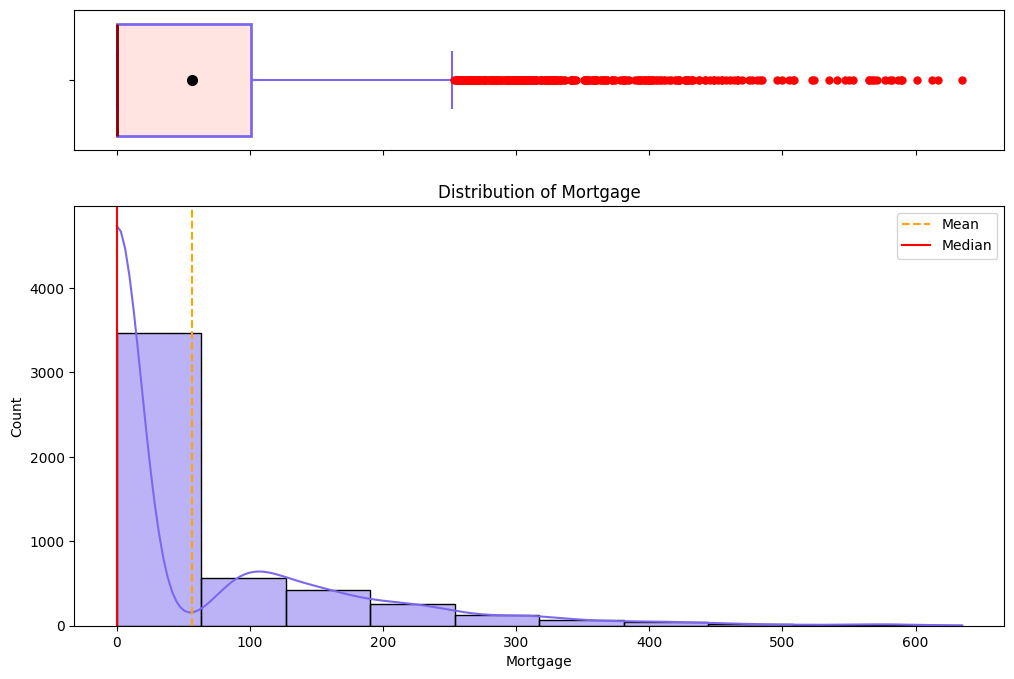

In [12]:
# Plotting Mortgage distribution
histogram_with_boxplot(data, "Mortgage", figsize=(12, 8), kde=True, bins=10)
plt.title("Distribution of Mortgage")
plt.show()

**Observation of the Plot:**

* The boxplot at the top shows several points marked in red beyond the upper whisker, indicating the presence of outliers.
* The distribution of the mortgage amounts is heavily right-skewed, with a majority of the values concentrated near zero.

**2. Number of Customers with Credit Cards**

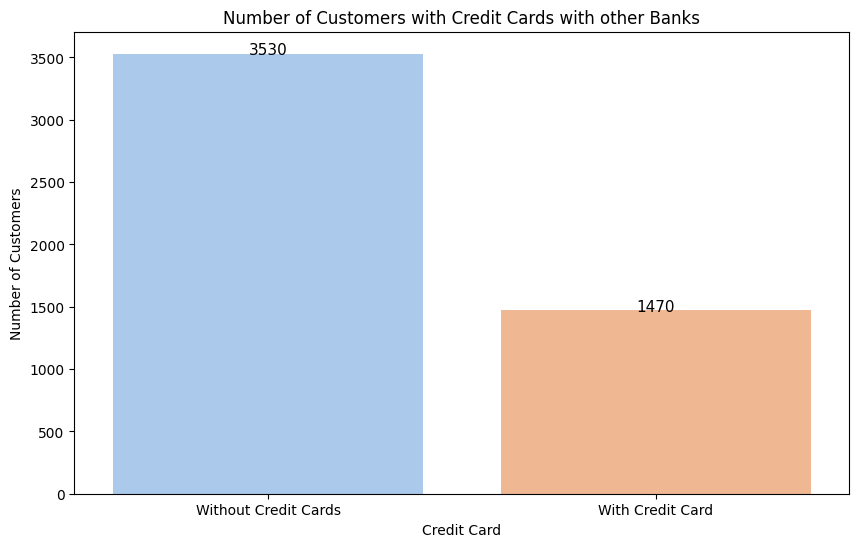

In [13]:
# Map the CreditCard values to more descriptive labels
data["CreditCard_map"] = data["CreditCard"].map(
    {1: "With Credit Card", 0: "Without Credit Cards"}
)

# Count the number of customers with and without credit cards
credit_card_counts = data["CreditCard_map"].value_counts().reset_index()
credit_card_counts.columns = ["CreditCard_map", "Count"]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=credit_card_counts,
    x="CreditCard_map",
    y="Count",
    palette="pastel",
    hue="CreditCard_map",
    dodge=False,
    legend=False,
)

# Add title and labels
plt.title("Number of Customers with Credit Cards with other Banks")
plt.xlabel("Credit Card")
plt.ylabel("Number of Customers")

# Add data labels on the bars with a vertical offset
for i, count in enumerate(credit_card_counts["Count"]):
    plt.text(
        i,
        count + (-0.008) * max(credit_card_counts["Count"]),
        str(count),
        ha="center",
        va="bottom",
        fontsize=11,
    )

plt.show()


**Observation of the Plot:**

The bar plot shows the number of customers with and without credit cards from other banks. Here is the key observation:

A significantly higher number of customers do not have credit cards from other banks compared to those who do.

### Bivariate analysis

**3. Attributes with Strong Correlation with Personal Loan**

Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal_Loan, dtype: float64


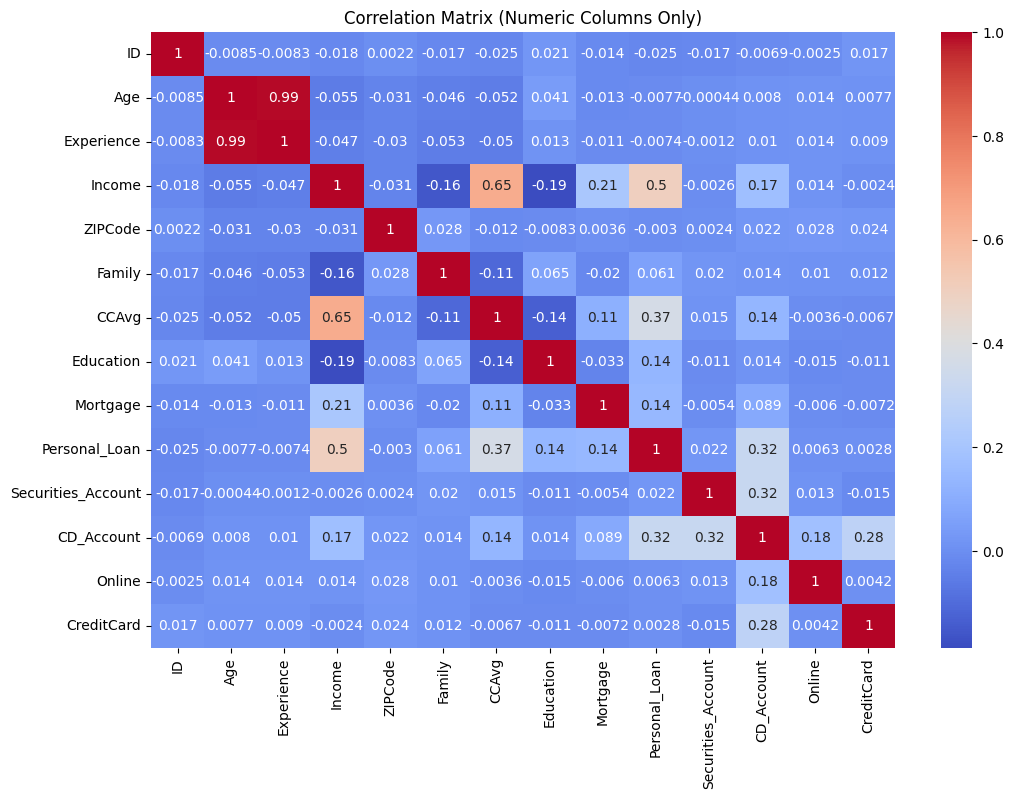

In [14]:
# Correlation matrix
# Convert 'Personal_Loan' using label encoding
label_encoder = LabelEncoder()

# Make a copy of the numeric columns
numeric_data = data.select_dtypes(include=[int, float]).copy()

# Check if 'Personal_Loan is in numeric_data.columns
if "Personal_Loan" in numeric_data.columns:
    # Compute the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Print correlations with 'Personal_Loan_numeric'
    personal_loan_corr = correlation_matrix["Personal_Loan"].sort_values(
        ascending=False
    )
    print(personal_loan_corr)

    # Plot the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix (Numeric Columns Only)")
    plt.show()
else:
    print("'Personal_Loan' column not found in numeric data.")

#### Observation of the Correlation Matrix:
The correlation matrix provides insights into the relationships between different numeric variables in the dataset. Here are the key observations:

**Personal Loan Correlation:**

* The Personal_Loan variable has the highest positive correlation with Income (0.50), CCAvg (0.37), and CD_Account (0.32).
* These correlations suggest that customers with higher income, higher average credit card spending, and CD accounts are more likely to take a personal loan.

**Age and Experience:**

* There is a very high positive correlation (0.99) between Age and Experience. * This is expected as typically, older individuals have more years of experience.

**Income and CCAvg:**

* There is a moderate positive correlation (0.65) between Income and CCAvg.
* This indicates that individuals with higher income tend to have higher average credit card spending.

**Mortgage and Income:**

There is a low positive correlation (0.21) between Mortgage and Income, suggesting that individuals with higher income might have higher mortgage values.

**Other Features:**

* CD_Account and Securities_Account have a moderate positive correlation (0.32) with Personal_Loan.
* Most other variables have very low or negligible correlations with each other, indicating minimal linear relationships.

**4. Interest in Purchasing Loan by Age**

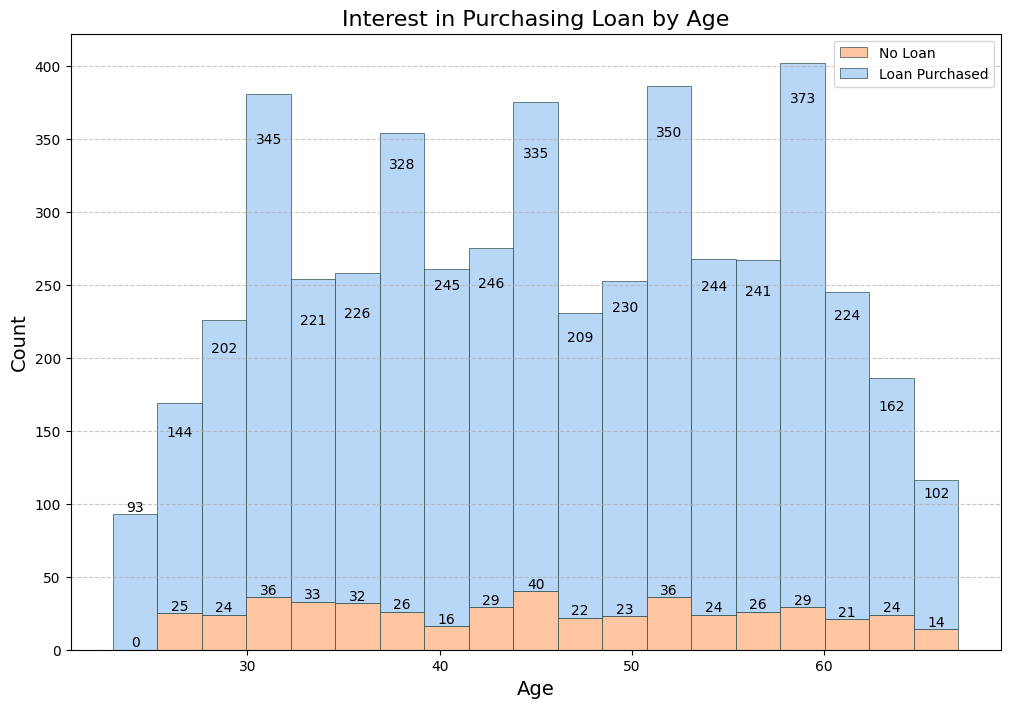

In [15]:
# Plotting a histplot that plots interest in purchsing by age
plt.figure(figsize=(12, 8))
ax = sns.histplot(
    data=data,
    x="Age",
    hue="Personal_Loan",
    multiple="stack",
    palette="pastel",
    edgecolor="darkslategray",
    linewidth=0.5,
)

plt.title("Interest in Purchasing Loan by Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.legend(["No Loan", "Loan Purchased"], loc="upper right")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.show()

#### Observations for the Plot: "Interest in Purchasing Loan by Age"

The histogram visualizes the distribution of customers' interest in purchasing loans by age. Here's a detailed observation of the plot:

**Overall Trend:**

* The majority of the customers fall within the age range of 30 to 60.
* The interest in purchasing loans is spread across all age groups, but there are noticeable peaks and valleys in certain age ranges.

**Age Distribution:**

* There are higher counts of customers in the age groups around 30, 40, and 50.
* The number of customers decreases slightly in the mid-30s and mid-40s age ranges.
* The number of customers increases again around the age of 60.

**Loan Purchased vs. No Loan:**

* Across all age groups, the number of customers who have not purchased a loan is significantly higher than those who have.
* The age group with the highest interest in purchasing loans appears to be around the age of 50, followed by age groups around 30 and 40.

**Proportion of Loan Purchased:**

* The proportion of customers purchasing loans is relatively consistent across most age groups, though there are minor variations.
* The highest number of loans purchased is observed in the age group around 50 (36 loans), followed by the age group around 60 (29 loans).


**5. Interest in Purchasing Loan by Education**

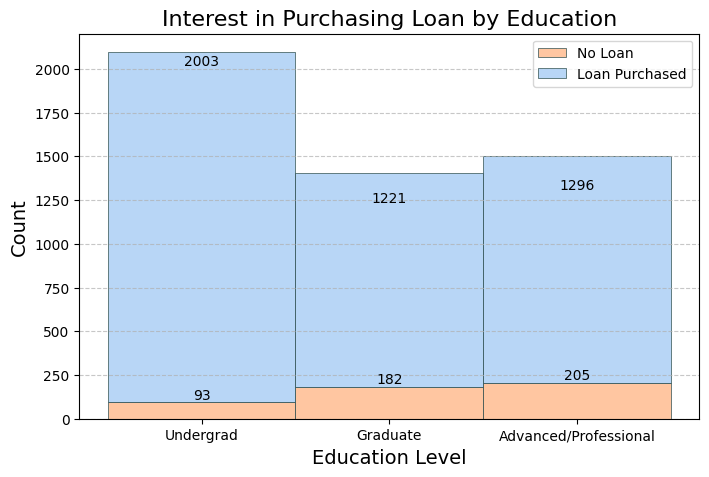

In [16]:
# Rename education levels
data["Education"] = data["Education"].map(
    {1: "Undergrad", 2: "Graduate", 3: "Advanced/Professional"}
)

plt.figure(figsize=(8, 5))
ax = sns.histplot(
    data=data,
    x="Education",
    hue="Personal_Loan",
    multiple="stack",
    palette="pastel",
    edgecolor="darkslategray",
    linewidth=0.5,
)

plt.title("Interest in Purchasing Loan by Education", fontsize=16)
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.legend(["No Loan", "Loan Purchased"], loc="upper right")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.xticks(rotation=0)
plt.show()

### Observations from the Plot: "Interest in Purchasing Loan by Education"

1. **General Trend:**

   - The majority of customers across all education levels have not purchased a loan, as indicated by the larger blue bars compared to the peach bars.

2. **Undergraduate Level:**

   - There are 2003 customers with an undergraduate education who have not purchased a loan.
   - There are only 93 customers with an undergraduate education who have purchased a loan.
   - This indicates a relatively low interest in purchasing loans among undergraduates.

3. **Graduate Level:**

   - There are 1221 customers with a graduate education who have not purchased a loan.
   - There are 182 customers with a graduate education who have purchased a loan.
   - While the number of customers with loans is higher than that of undergraduates, the overall interest in purchasing loans is still moderate.

4. **Advanced/Professional Level:**

   - There are 1296 customers with advanced/professional education who have not purchased a loan.
   - There are 205 customers with advanced/professional education who have purchased a loan.
   - This group shows the highest interest in purchasing loans, with the largest number of loan purchasers among the three education levels.

5. **Comparative Analysis:**

   - The undergraduates have the highest total number of customers but the lowest number of loan purchasers.
   - Graduates have a moderate number of loan purchasers compared to undergraduates and advanced/professional customers.
   - Advanced/professional customers, despite having fewer total customers than undergraduates, show the highest interest in purchasing loans.

6. **Implications:**
   - Higher education levels correlate with a higher likelihood of purchasing loans.
   - Marketing strategies for loans might need to be tailored differently for each education level, focusing more on advanced/professional customers who show the highest interest.
     this data?



## Data Preprocessing
* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)


#### Missing Value treatment

In [17]:
# Check for missing values
print(data.isnull().sum())

# Fill missing numerical values with the median
for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].median(), inplace=True)

# Fill missing categorical values with the mode
for column in data.select_dtypes(include=[object]).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
CreditCard_map        0
dtype: int64


In [18]:
# Verify no missing values remain
print(data.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
CreditCard_map        0
dtype: int64


In [19]:
# Create age
bins = [20, 30, 40, 50, 60, 70]
labels = ["20-29", "30-39", "40-49", "50-59", "60-69"]
data["Age_Category"] = pd.cut(data["Age"], bins=bins, labels=labels, right=False)

#### Outlier Detection and Treatment

We'll check for outliers in numerical columns and apply treatment if necessary. Let's focus on Income, CCAvg, and Mortgage columns based on initial insights.

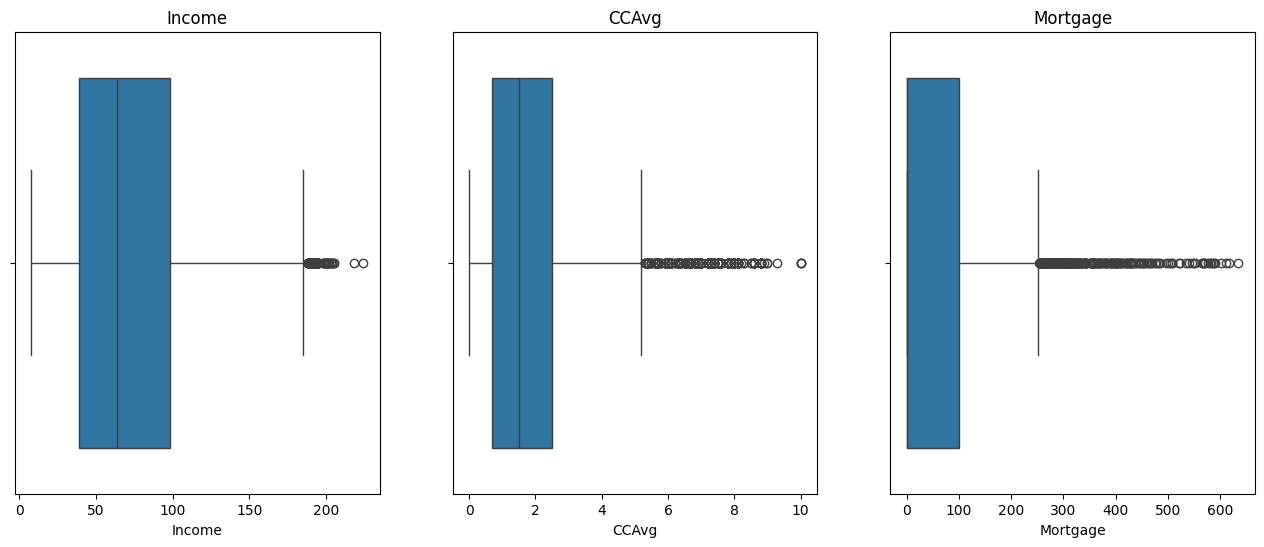

In [20]:
# Boxplots to visualize outliers
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x=data["Income"])
plt.title("Income")

plt.subplot(1, 3, 2)
sns.boxplot(x=data["CCAvg"])
plt.title("CCAvg")

plt.subplot(1, 3, 3)
sns.boxplot(x=data["Mortgage"])
plt.title("Mortgage")

plt.show()

All three variables: **Income, CCAvg, and Mortgage** — exhibit outliers primarily on the higher end of their respective distributions. This suggests that there are individuals in the dataset with significantly higher income, credit card usage, and mortgage amounts compared to the majority.








#### Winsorization for outliers from the boxplots.

In [21]:
from scipy.stats.mstats import winsorize
# Winsorize outliers in Income, CCAvg, and Mortgage columns
data["Income"] = winsorize(data["Income"], limits=[0.05, 0.05])
data["CCAvg"] = winsorize(data["CCAvg"], limits=[0.05, 0.05])
data["Mortgage"] = winsorize(data["Mortgage"], limits=[0.05, 0.05])

#### Removing anomalies

In [22]:
# Check for anomalous values
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [23]:
# Gathering rows where Experience < 0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [24]:
# Correcting the anomalous values
data["Experience"] = data["Experience"].map(lambda x: abs(x))

In [25]:
# Checking again
data[data["Experience"] < 0]["Experience"].unique()

array([], dtype=int64)

In [26]:
# Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

In [27]:
# Checking to confirm
data.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIPCode               category
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
CreditCard_map          object
Age_Category          category
dtype: object

### Feature engineering

In [28]:
# Drop unnecessary columns (experience is perfectly correlated with age)
data.drop(columns=["CreditCard_map", "Experience"], inplace=True)

In [29]:
# Create polynomial features for Income
data['Income_Squared'] = data['Income'] ** 2
data['Income_Cubed'] = data['Income'] ** 3

# Log transform for skewed features
data['Log_Income'] = np.log(data['Income'] + 1)  # Adding 1 to avoid log(0)

# Binarize CCAvg into high vs. low spending
data['High_Spender'] = data['CCAvg'].apply(lambda x: 1 if x > data['CCAvg'].median() else 0)

In [30]:
# Encode categorical variables
data = pd.get_dummies(data, columns=["Education", "Age_Category"], drop_first=True)

In [31]:
# Create interaction feature between Income and Education_Undergrad
data['Income_Education_Interaction'] = data['Income'] * data['Education_Undergrad']

### Data preparation for modelling

In [32]:
# Separate features and target variable
X = data.drop(["ID", "ZIPCode", "Personal_Loan"], axis=1)
y = data["Personal_Loan"]

In [33]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [34]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(round(y_train.value_counts(normalize=True), 2))
print("Percentage of classes in test set:")
print(round(y_test.value_counts(normalize=True), 2))

Shape of Training set :  (4000, 20)
Shape of test set :  (1000, 20)
Percentage of classes in training set:
Personal_Loan
0    0.91
1    0.09
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.9
1    0.1
Name: proportion, dtype: float64


In [35]:
feature_names = list(X.columns)

### Creating functions to assess the performance of the models

In [36]:
def plot_confusion_matrix(model, X_test, y_test):
    """
    Plot a confusion matrix with percentages.

    Parameters:
    model : classifier object
        The trained classifier model.
    X_test : array-like, shape (n_samples, n_features)
        Test data used for prediction.
    y_test : array-like, shape (n_samples,)
        True labels of the test data.
    """
    # Predict classes
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate percentages and format labels
    labels = np.asarray(
        [
            f"{value}\n{percent:.2%}"
            for value, percent in zip(cm.flatten(), cm.flatten() / np.sum(cm))
        ]
    ).reshape(2, 2)

    # Plot confusion matrix with annotations
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, annot=labels, fmt="", cmap="Blues", cbar=False, annot_kws={"fontsize": 12}
    )
    plt.ylabel("True Label", fontsize=12)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.title("Confusion Matrix", fontsize=14)
    plt.show()

In [37]:
def compute_classification_metrics(model, X_test, y_test):
    """
    Compute different metrics to evaluate classification model performance.

    Parameters:
    model : classifier object
        The trained classifier model.
    X_test : array-like, shape (n_samples, n_features)
        Test data used for prediction.
    y_test : array-like, shape (n_samples,)
        True labels of the test data.

    Returns: pd.Dataframe of classification report
    """
    # Predict using the test data
    y_pred = model.predict(X_test)
    print(f"Metrics for model: {model.__class__.__name__}")
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    return pd.DataFrame(report_dict).transpose()

## Building and Evaluating the Model

### Model evaluation criterion
**Balancing Precision and Recall:** The F1 Score helps ensure that the model not only identifies potential loan customers (high recall) but also minimizes false positives (high precision), which is crucial for optimizing marketing resources.

 **Note:** *Other models, such as Logistic Regression, Random Forest and KMeans have also been used for the purpose of a comparitive analysis*

#### 1. Logistic Regression

In [38]:
# Build the logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Check the performance of logistic regression on the training data

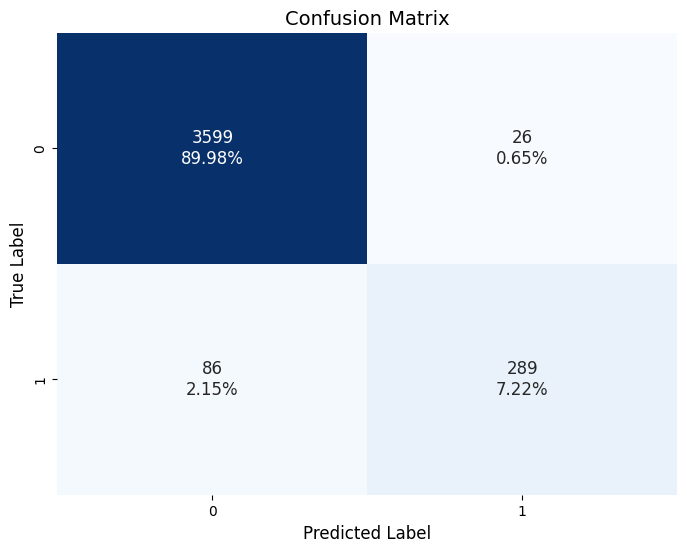

In [39]:
plot_confusion_matrix(lr_model, X_train, y_train)

In [40]:
logistic_regression_train = compute_classification_metrics(lr_model, X_train, y_train)
logistic_regression_train

Metrics for model: LogisticRegression


precision    recall  f1-score   support
0              0.976662  0.992828  0.984679  3625.000
1              0.917460  0.770667  0.837681   375.000
accuracy       0.972000  0.972000  0.972000     0.972
macro avg      0.947061  0.881747  0.911180  4000.000
weighted avg   0.971112  0.972000  0.970898  4000.000

Decision Tree Classifier

In [41]:
# Build the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

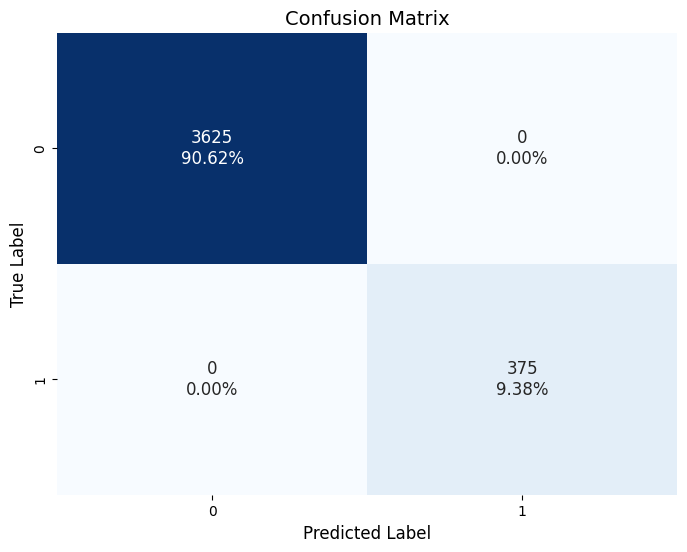

In [42]:
plot_confusion_matrix(dt_model, X_train, y_train)

In [43]:
decision_tree_train = compute_classification_metrics(dt_model, X_train, y_train)
decision_tree_train

Metrics for model: DecisionTreeClassifier


precision  recall  f1-score  support
0                   1.0     1.0       1.0   3625.0
1                   1.0     1.0       1.0    375.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4000.0
weighted avg        1.0     1.0       1.0   4000.0

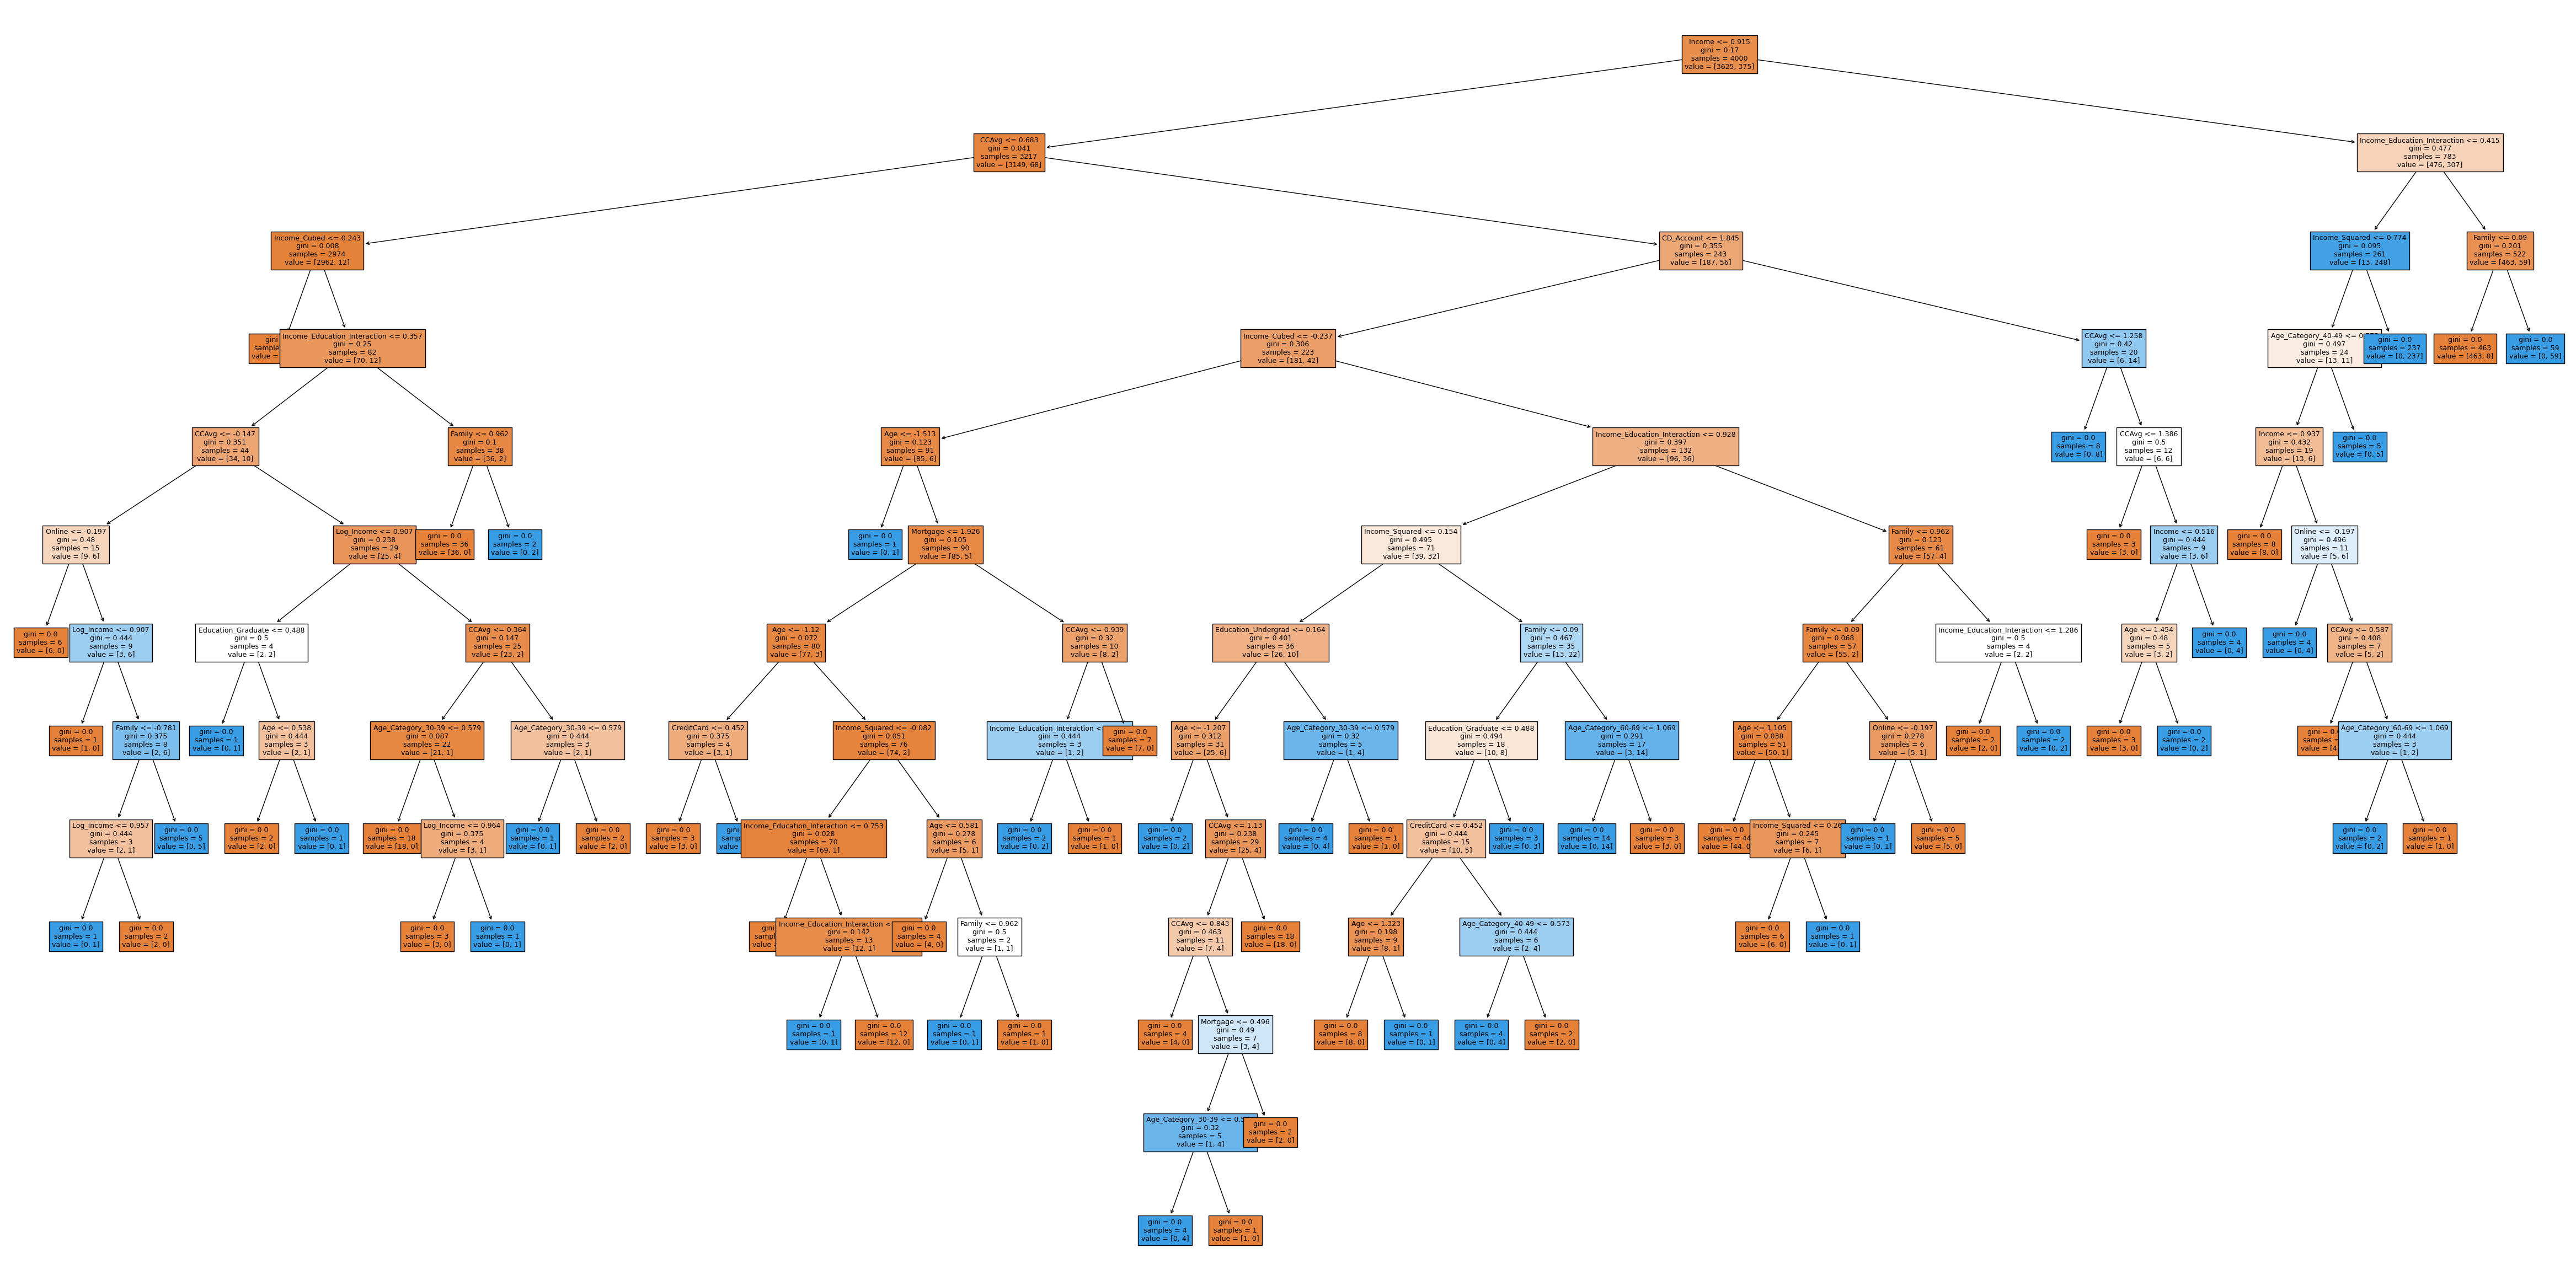

In [44]:
from sklearn import tree
class_names = None
plt.figure(figsize=(60, 30))
out = tree.plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    fontsize=9,
    node_ids=False,
)

# Adding arrows to the decision tree splits
for o in out :
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [45]:
print(tree.export_text(dt_model, feature_names=feature_names, show_weights=True))

|--- Income <= 0.91
|   |--- CCAvg <= 0.68
|   |   |--- Income_Cubed <= 0.24
|   |   |   |--- weights: [2892.00, 0.00] class: 0
|   |   |--- Income_Cubed >  0.24
|   |   |   |--- Income_Education_Interaction <= 0.36
|   |   |   |   |--- CCAvg <= -0.15
|   |   |   |   |   |--- Online <= -0.20
|   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |--- Online >  -0.20
|   |   |   |   |   |   |--- Log_Income <= 0.91
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |--- Log_Income >  0.91
|   |   |   |   |   |   |   |--- Family <= -0.78
|   |   |   |   |   |   |   |   |--- Log_Income <= 0.96
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |--- Log_Income >  0.96
|   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Family >  -0.78
|   |   |   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |--- CCA

In [46]:
# All the feature in descending order of importance
print(pd.DataFrame(dt_model.feature_importances_, columns=["Imp"], index=X.columns).sort_values(by="Imp", ascending=False))

                                   Imp
Income_Education_Interaction  0.382787
Income                        0.261380
Family                        0.169901
CCAvg                         0.053093
Income_Squared                0.028141
Age                           0.016698
CD_Account                    0.014139
Income_Cubed                  0.011803
Online                        0.010982
Age_Category_40-49            0.009376
Age_Category_60-69            0.009231
Log_Income                    0.007430
Age_Category_30-39            0.007272
CreditCard                    0.005476
Education_Undergrad           0.004660
Education_Graduate            0.004250
Mortgage                      0.003381
Securities_Account            0.000000
High_Spender                  0.000000
Age_Category_50-59            0.000000


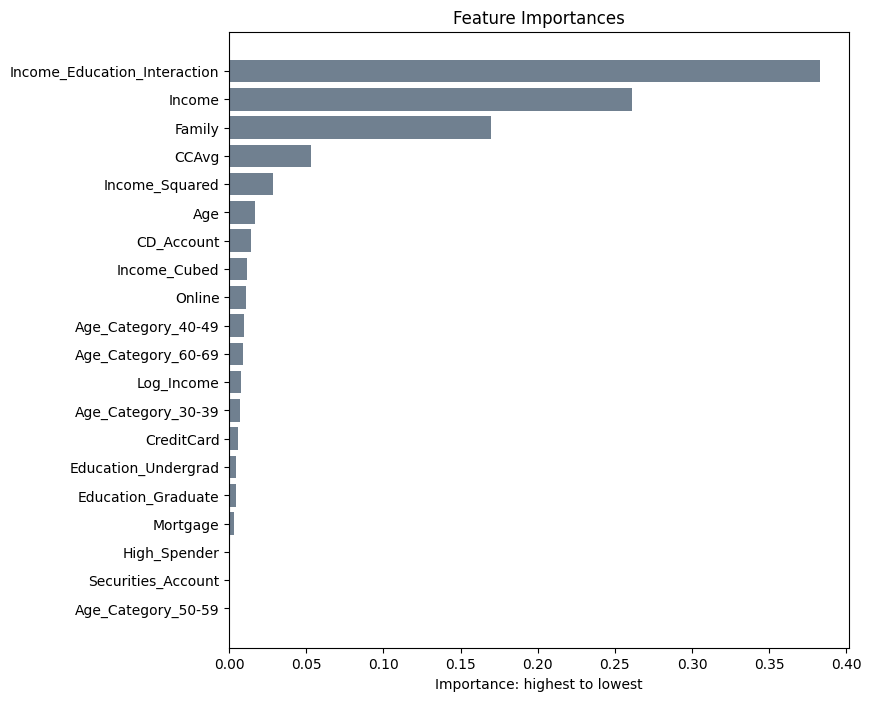

In [47]:
# Plotting the order of importances
importances = dt_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="slategray", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance: highest to lowest")
plt.show()

#### Evaluation of Decision Tree Classifier
##### Perfect Classification on Training Set:
- The model perfectly classifies all training instances, as indicated by the confusion matrix with 100% accuracy, precision, recall, and F1-score.
- This perfect classification suggests that the model has learned the training data extremely well.

##### Potential Overfitting:
- The complexity of the decision tree and perfect classification on the training set strongly indicate overfitting. The model may not generalize well to unseen data.
- It is crucial to validate the model's performance on a separate validation or test set to ensure it generalizes well and doesn't just memorize the training data.


#### 2. Random Forest Classifier




In [48]:
from sklearn.ensemble import RandomForestClassifier
# Build the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

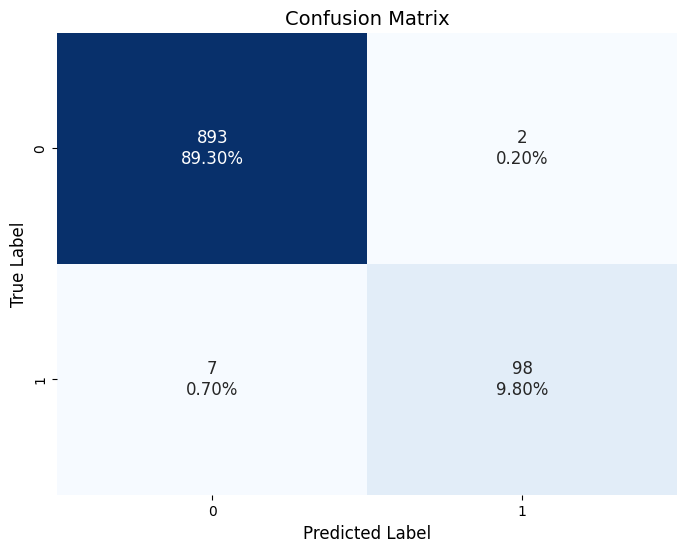

In [49]:
plot_confusion_matrix(rf_model, X_test, y_test)

In [50]:
random_forest_train = compute_classification_metrics(rf_model, X_train, y_train)
random_forest_train

Metrics for model: RandomForestClassifier


precision  recall  f1-score  support
0                   1.0     1.0       1.0   3625.0
1                   1.0     1.0       1.0    375.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4000.0
weighted avg        1.0     1.0       1.0   4000.0

##### Visualizing feature importance of random forest classifier

In [51]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

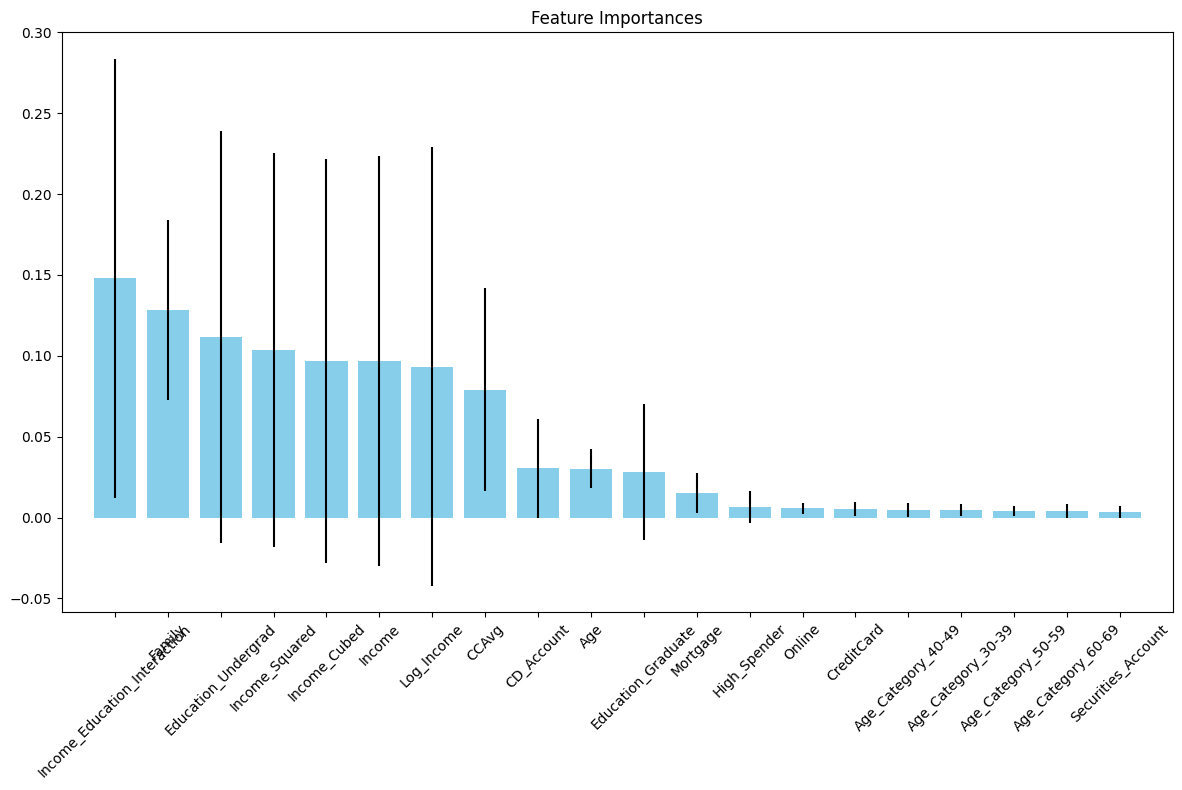

In [52]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(
    range(X_train.shape[1]),
    importances[indices],
    color="skyblue",
    yerr=std[indices],
    align="center",
)
plt.xticks(
    range(X_train.shape[1]), np.array(feature_names)[indices], rotation=45
)  # Adjust rotation angle here
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [53]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

In [54]:
# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

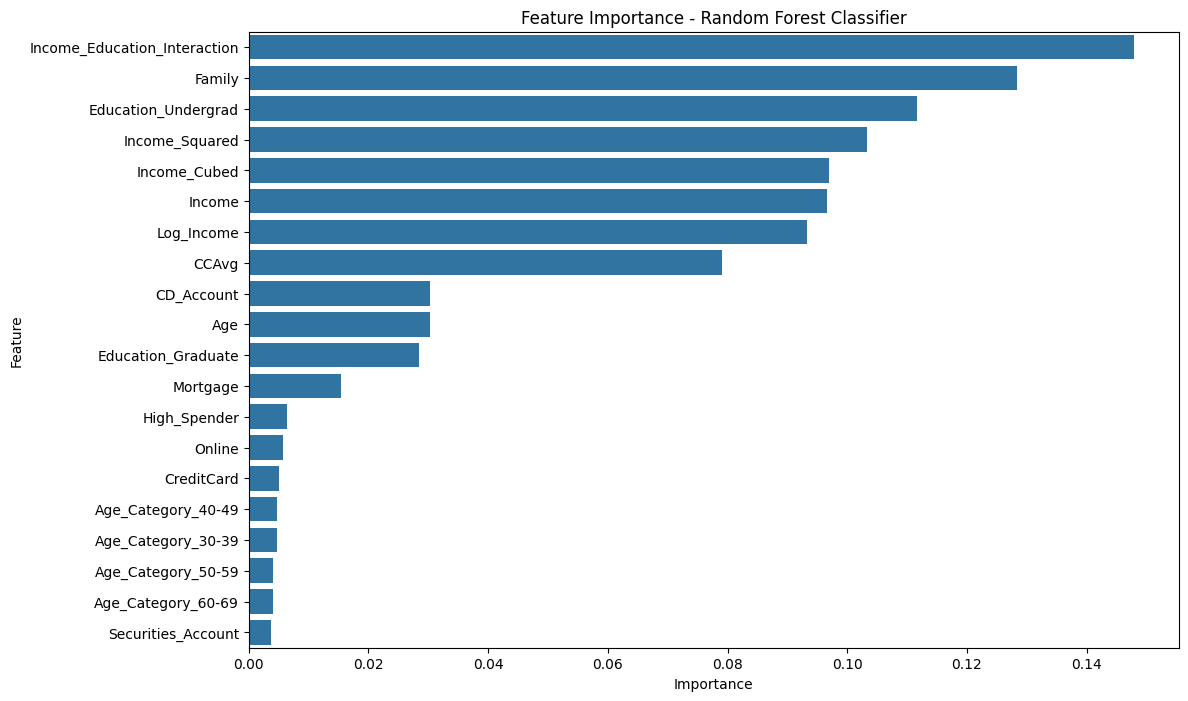

In [55]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance - Random Forest Classifier")
plt.show()

### 3. K-Means Clustering and Analysis

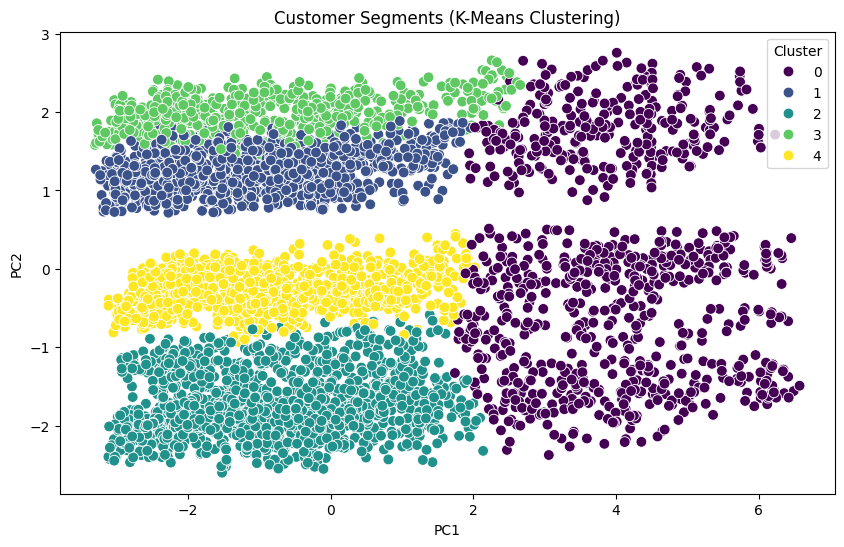

In [56]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Number of clusters
k = 5

# Fit the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
data["Cluster"] = clusters

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
data["PC1"] = principal_components[:, 0]
data["PC2"] = principal_components[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=60)
plt.title("Customer Segments (K-Means Clustering)")
plt.show()

**Distribution:**

The clusters are well-separated, indicating that the K-Means algorithm has successfully identified distinct groups.
The clusters are roughly linear and parallel, suggesting some underlying structure in the data that the principal components are capturing.

**Cluster Sizes:**

All clusters appear to have a similar number of points, indicating a balanced clustering without any significantly larger or smaller groups.

In [57]:
# Calculate silhouette score
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score: ", sil_score)
# Convert Personal_Loan to numeric
data["Personal_Loan"] = data["Personal_Loan"].astype(int)

Silhouette Score:  0.17666284412676694


In [58]:

# Calculate loan acceptance rate by cluster
cluster_loan_acceptance = data.groupby("Cluster")["Personal_Loan"].mean()
print("Loan Acceptance Rate by Cluster:\n", cluster_loan_acceptance)

Loan Acceptance Rate by Cluster:
 Cluster
0    0.355390
1    0.034452
2    0.037846
3    0.045217
4    0.030550
Name: Personal_Loan, dtype: float64


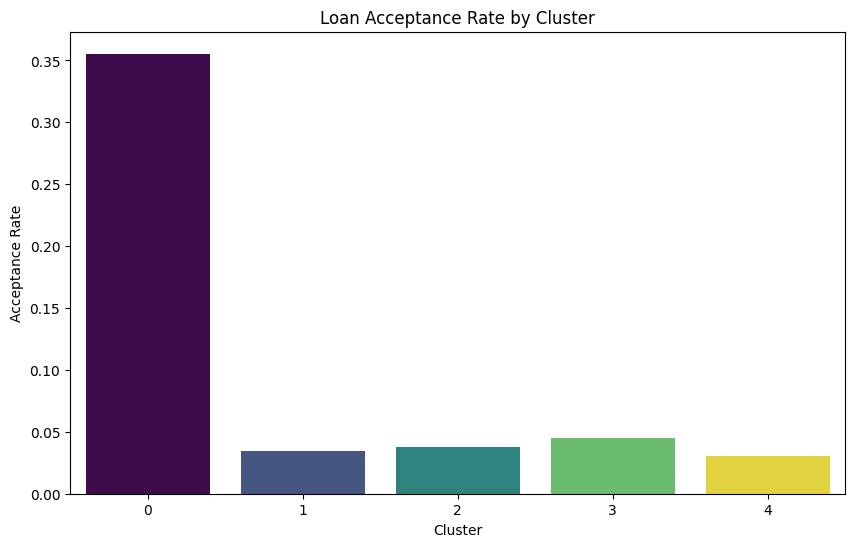

In [59]:
# Visualize the loan acceptance rate by cluster
plt.figure(figsize=(10, 6))
sns.barplot(
    x=cluster_loan_acceptance.index,
    y=cluster_loan_acceptance.values,
    hue=cluster_loan_acceptance.index,
    palette="viridis",
    dodge=False,
    legend=False,
)
plt.title("Loan Acceptance Rate by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=0)
plt.show()

#### Building a Model to Predict Loan Acceptance Using Clusters

In [60]:
# Add cluster labels as a feature
X_with_clusters = np.hstack((X_scaled, clusters.reshape(-1, 1)))

# Split the data with cluster labels
X_train_wc, X_test_wc, y_train_wc, y_test_wc = train_test_split(
    X_with_clusters, y, test_size=0.2, random_state=42
)

In [61]:
# Build the logistic regression model
model_wc = LogisticRegression(random_state=42)
model_wc.fit(X_train_wc, y_train_wc)

LogisticRegression(random_state=42)

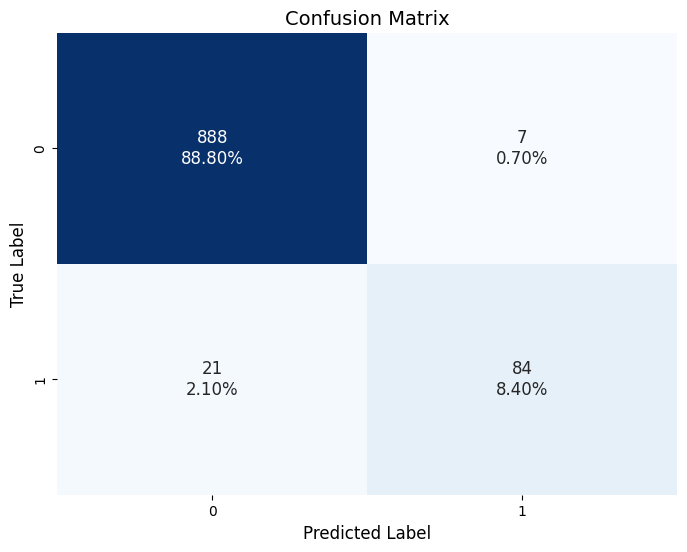

In [62]:
plot_confusion_matrix(model_wc, X_test_wc, y_test_wc)

In [63]:
logistic_regression_test_clusters = compute_classification_metrics(
    model_wc, X_test_wc, y_test
)
logistic_regression_test_clusters

Metrics for model: LogisticRegression


precision    recall  f1-score   support
0              0.976898  0.992179  0.984479   895.000
1              0.923077  0.800000  0.857143   105.000
accuracy       0.972000  0.972000  0.972000     0.972
macro avg      0.949987  0.896089  0.920811  1000.000
weighted avg   0.971247  0.972000  0.971109  1000.000

In [64]:
# Extract feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

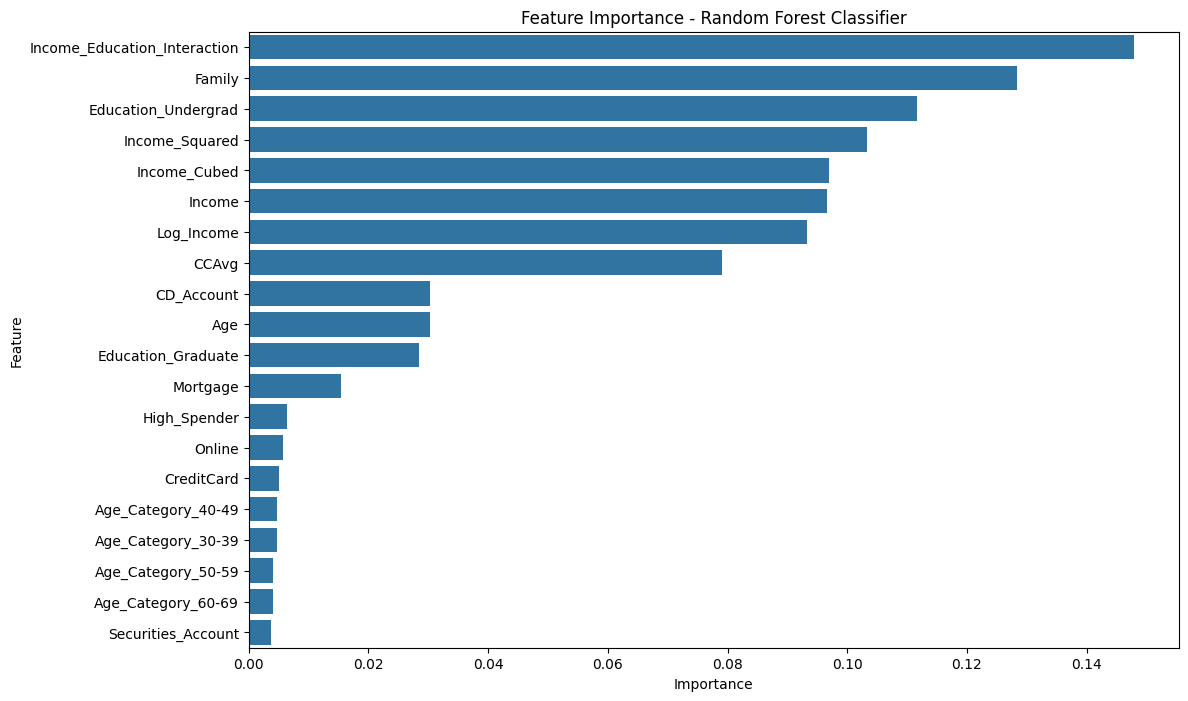

In [65]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance - Random Forest Classifier")
plt.show()

### Pre-Pruning
# Choose the type of classifier.

In [66]:
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(4, 12),
    "min_samples_leaf": [2, 4, 6, 8],
    "max_leaf_nodes": [5, 10, 15, 20],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [67]:
# Set the estimator to the best combination of parameters
best_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the training data
best_estimator.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_obj.best_params_)
# Checking performance of training data

Best parameters found:  {'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 8}


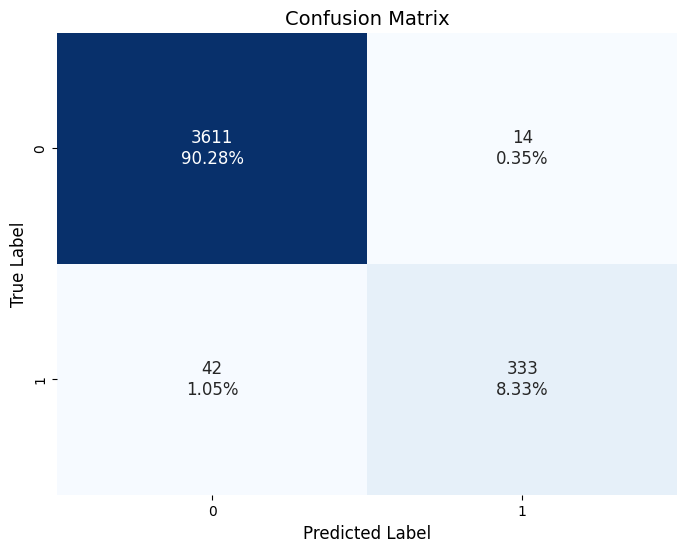

In [68]:
plot_confusion_matrix(best_estimator, X_train, y_train)

In [69]:
decision_tree_pre_pruned_train = compute_classification_metrics(
    best_estimator, X_train, y_train
)
decision_tree_pre_pruned_train

Metrics for model: DecisionTreeClassifier


precision    recall  f1-score   support
0              0.988503  0.996138  0.992306  3625.000
1              0.959654  0.888000  0.922438   375.000
accuracy       0.986000  0.986000  0.986000     0.986
macro avg      0.974078  0.942069  0.957372  4000.000
weighted avg   0.985798  0.986000  0.985755  4000.000

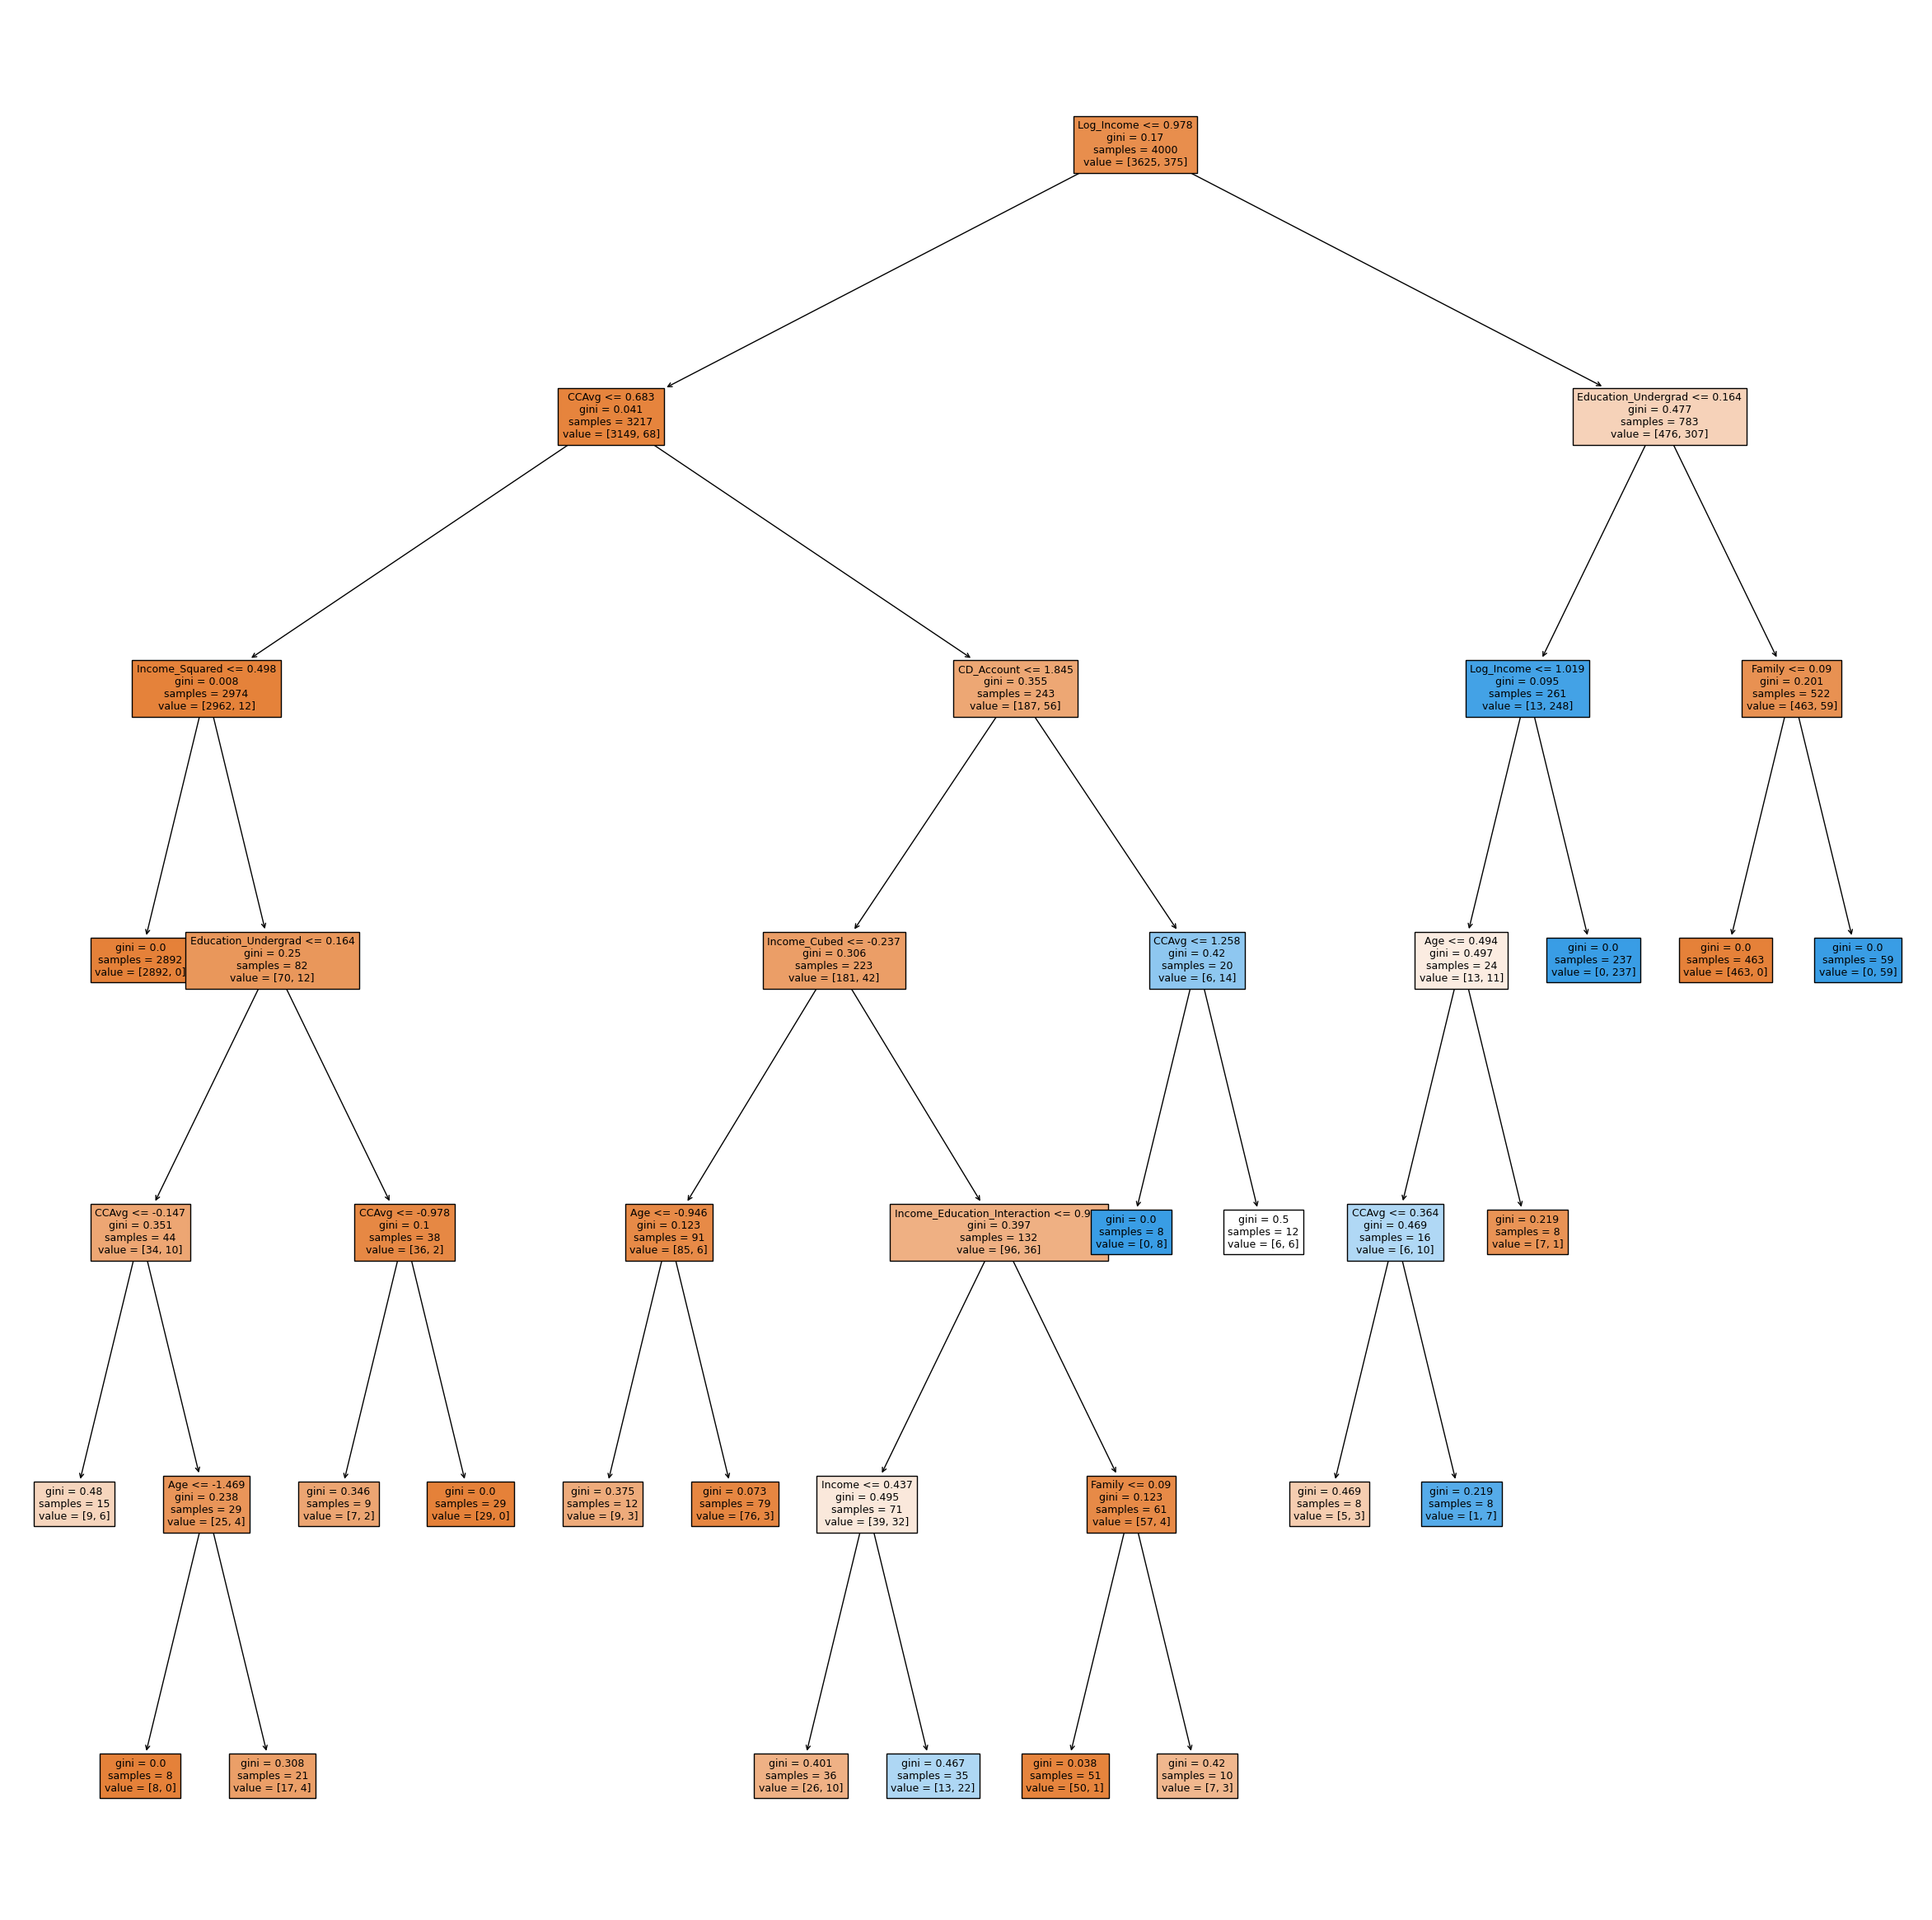

In [70]:
from sklearn import tree

class_names = None

plt.figure(figsize=(30, 30))
out = tree.plot_tree(
    best_estimator,
    feature_names=feature_names,
    class_names=class_names,

    filled=True,
    fontsize=9,
    node_ids=False,
)

# Adding arrows to the decision tree splits
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

In [71]:
# Rules of the decision tree
print(tree.export_text(best_estimator, feature_names=feature_names, show_weights=True))

|--- Log_Income <= 0.98
|   |--- CCAvg <= 0.68
|   |   |--- Income_Squared <= 0.50
|   |   |   |--- weights: [2892.00, 0.00] class: 0
|   |   |--- Income_Squared >  0.50
|   |   |   |--- Education_Undergrad <= 0.16
|   |   |   |   |--- CCAvg <= -0.15
|   |   |   |   |   |--- weights: [9.00, 6.00] class: 0
|   |   |   |   |--- CCAvg >  -0.15
|   |   |   |   |   |--- Age <= -1.47
|   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  -1.47
|   |   |   |   |   |   |--- weights: [17.00, 4.00] class: 0
|   |   |   |--- Education_Undergrad >  0.16
|   |   |   |   |--- CCAvg <= -0.98
|   |   |   |   |   |--- weights: [7.00, 2.00] class: 0
|   |   |   |   |--- CCAvg >  -0.98
|   |   |   |   |   |--- weights: [29.00, 0.00] class: 0
|   |--- CCAvg >  0.68
|   |   |--- CD_Account <= 1.85
|   |   |   |--- Income_Cubed <= -0.24
|   |   |   |   |--- Age <= -0.95
|   |   |   |   |   |--- weights: [9.00, 3.00] class: 0
|   |   |   |   |--- Age >  -0.95
|   |   |   

In [72]:
# Importance of features in the tree building
print(pd.DataFrame(best_estimator.feature_importances_, columns=["Imp"], index=feature_names).sort_values(by="Imp", ascending=False))

                                   Imp
Education_Undergrad           0.406915
Log_Income                    0.308897
Family                        0.175917
CCAvg                         0.048917
Income_Education_Interaction  0.016157
CD_Account                    0.015952
Income_Cubed                  0.007647
Income                        0.007250
Age                           0.006679
Income_Squared                0.005669
Online                        0.000000
CreditCard                    0.000000
Securities_Account            0.000000
High_Spender                  0.000000
Education_Graduate            0.000000
Mortgage                      0.000000
Age_Category_30-39            0.000000
Age_Category_40-49            0.000000
Age_Category_50-59            0.000000
Age_Category_60-69            0.000000


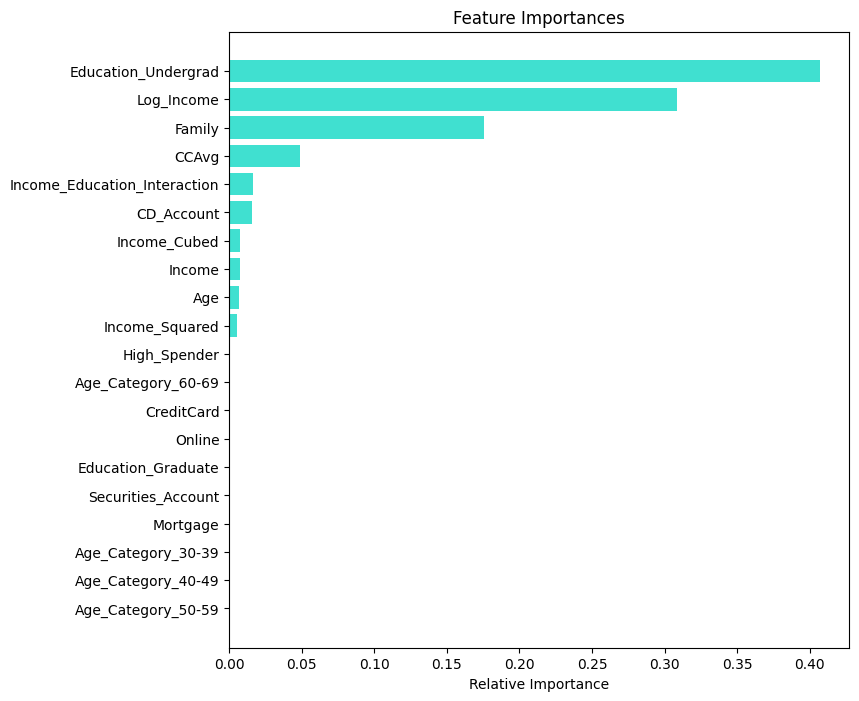

In [73]:
importances = best_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="turquoise", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##### Checking on test data

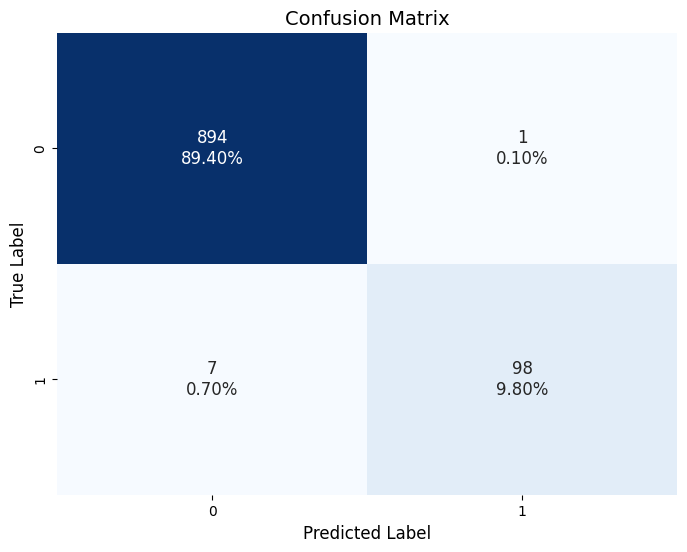

In [74]:
plot_confusion_matrix(best_estimator, X_test, y_test)

In [75]:
decision_tree_pre_pruned_test = compute_classification_metrics(
    best_estimator, X_test, y_test
)
decision_tree_pre_pruned_test

Metrics for model: DecisionTreeClassifier


precision    recall  f1-score   support
0              0.992231  0.998883  0.995546   895.000
1              0.989899  0.933333  0.960784   105.000
accuracy       0.992000  0.992000  0.992000     0.992
macro avg      0.991065  0.966108  0.978165  1000.000
weighted avg   0.991986  0.992000  0.991896  1000.000

### Cost-complexity pruning

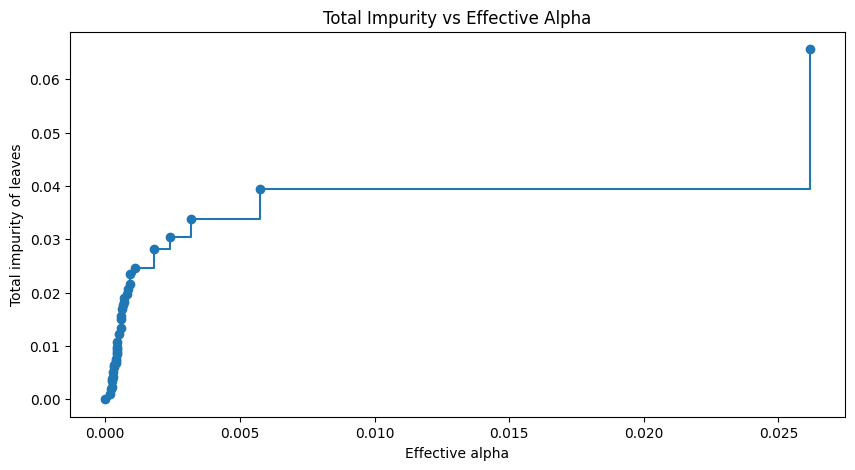

In [76]:
cost_complexity_prune_model = DecisionTreeClassifier(random_state=1)
path = cost_complexity_prune_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)[:5]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha")
plt.show()

In [77]:
# Find the alpha with the maximum drop in impurity
max_drop_index = np.argmax(np.diff(impurities))
optimal_alpha = ccp_alphas[max_drop_index]

print(f"Optimal ccp_alpha with maximum drop in impurity: {optimal_alpha:.4f}")

Optimal ccp_alpha with maximum drop in impurity: 0.0262


#### Training the decision tree using effective alphas:

In [78]:
cost_complexity_tree = []
for ccp_alpha in ccp_alphas:
    node = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    node.fit(X_train, y_train)
    cost_complexity_tree.append(node)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        cost_complexity_tree[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.052149301489438284


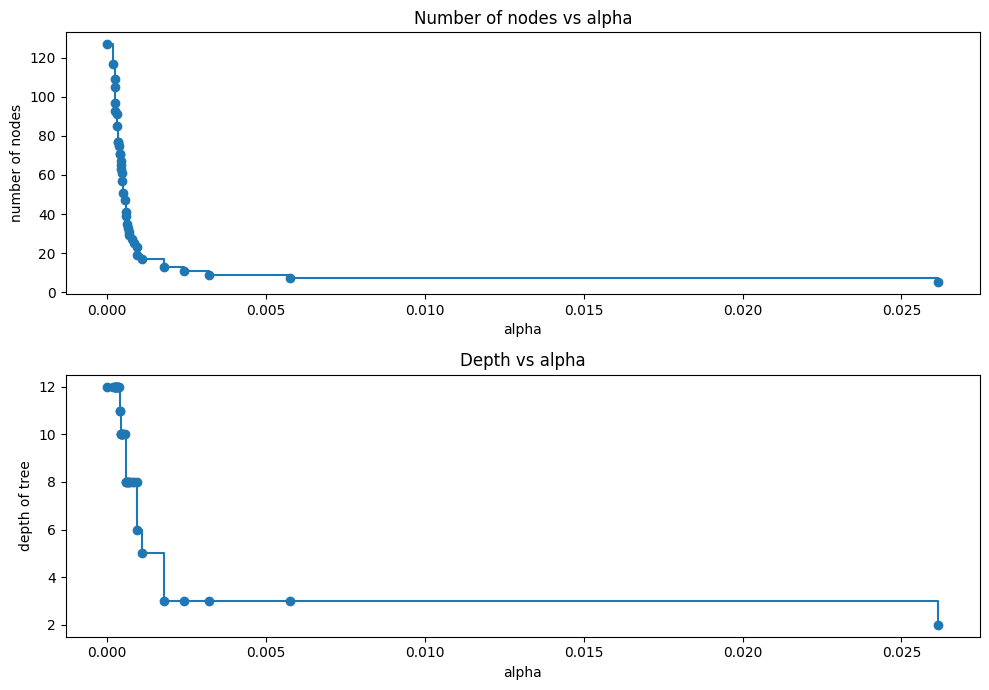

In [79]:
cost_complexity_tree = cost_complexity_tree[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [
    cost_complexity_tree.tree_.node_count
    for cost_complexity_tree in cost_complexity_tree
]
depth = [
    cost_complexity_tree.tree_.max_depth
    for cost_complexity_tree in cost_complexity_tree
]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Plotting Recall against alpha for training and testing data set splits

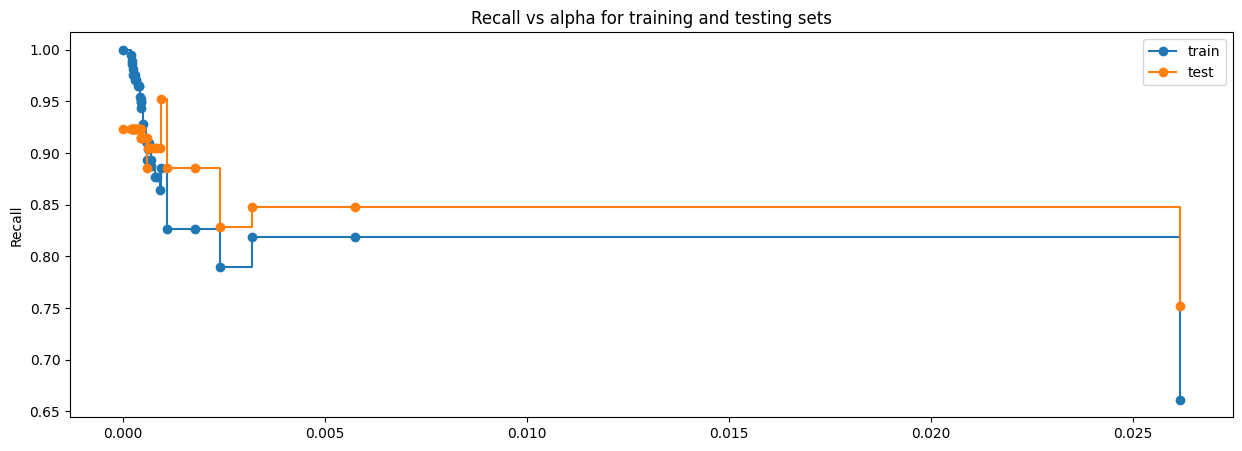

In [80]:
recall_train = []
for node in cost_complexity_tree:
    pred_train = node.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for node in cost_complexity_tree:
    pred_test = node.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [81]:
index_best_model = np.argmax(recall_test)
best_model = cost_complexity_tree[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.000931746031746032, random_state=1)


### Post-pruning

In [82]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=optimal_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.026165708812260532,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### Check the post-pruned tree in training data

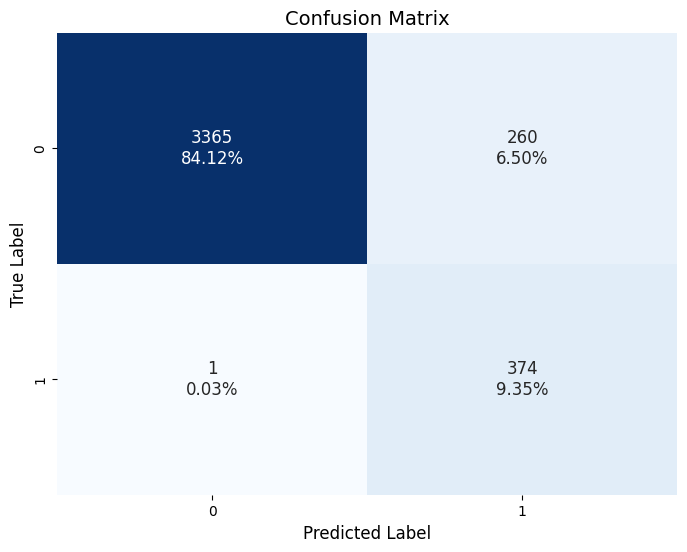

In [83]:
plot_confusion_matrix(estimator_2, X_train, y_train)

In [84]:
decision_tree_post_pruned_train = compute_classification_metrics(
    estimator_2, X_train, y_train
)
decision_tree_post_pruned_train

Metrics for model: DecisionTreeClassifier


precision    recall  f1-score     support
0              0.999703  0.928276  0.962666  3625.00000
1              0.589905  0.997333  0.741328   375.00000
accuracy       0.934750  0.934750  0.934750     0.93475
macro avg      0.794804  0.962805  0.851997  4000.00000
weighted avg   0.961284  0.934750  0.941916  4000.00000

##### Visualize the pruned decision tree

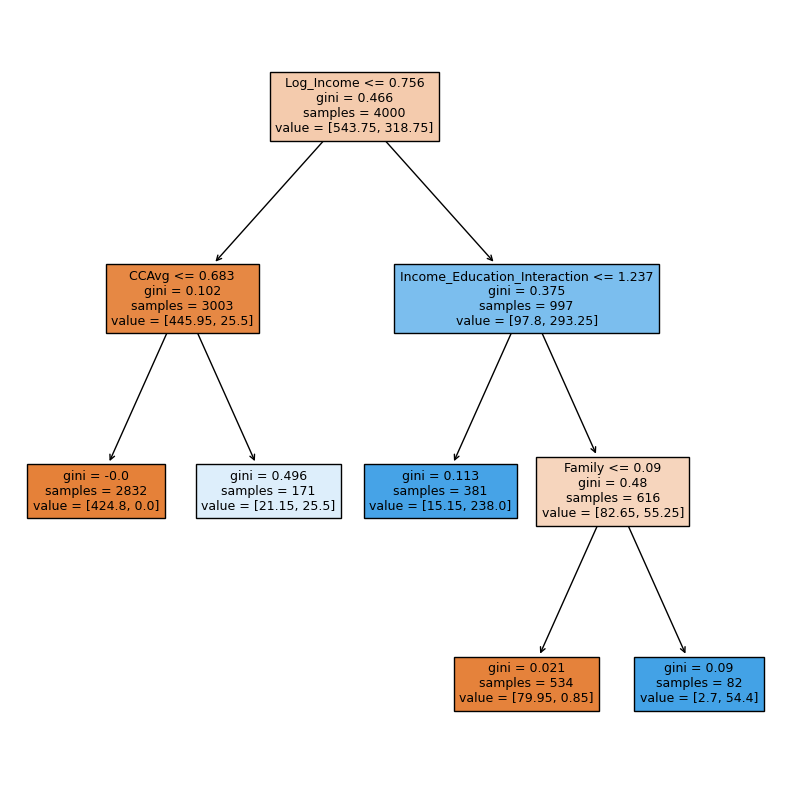

In [85]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [86]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Log_Income <= 0.76
|   |--- CCAvg <= 0.68
|   |   |--- weights: [424.80, 0.00] class: 0
|   |--- CCAvg >  0.68
|   |   |--- weights: [21.15, 25.50] class: 1
|--- Log_Income >  0.76
|   |--- Income_Education_Interaction <= 1.24
|   |   |--- weights: [15.15, 238.00] class: 1
|   |--- Income_Education_Interaction >  1.24
|   |   |--- Family <= 0.09
|   |   |   |--- weights: [79.95, 0.85] class: 0
|   |   |--- Family >  0.09
|   |   |   |--- weights: [2.70, 54.40] class: 1



In [87]:
print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=feature_names
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
Log_Income                    0.602619
Family                        0.172946
Income_Education_Interaction  0.151301
CCAvg                         0.073135
Age_Category_60-69            0.000000
Age_Category_50-59            0.000000
Age_Category_40-49            0.000000
Age_Category_30-39            0.000000
Education_Undergrad           0.000000
Education_Graduate            0.000000
High_Spender                  0.000000
Age                           0.000000
Income                        0.000000
Income_Squared                0.000000
CreditCard                    0.000000
Online                        0.000000
CD_Account                    0.000000
Securities_Account            0.000000
Mortgage                      0.000000
Income_Cubed                  0.000000


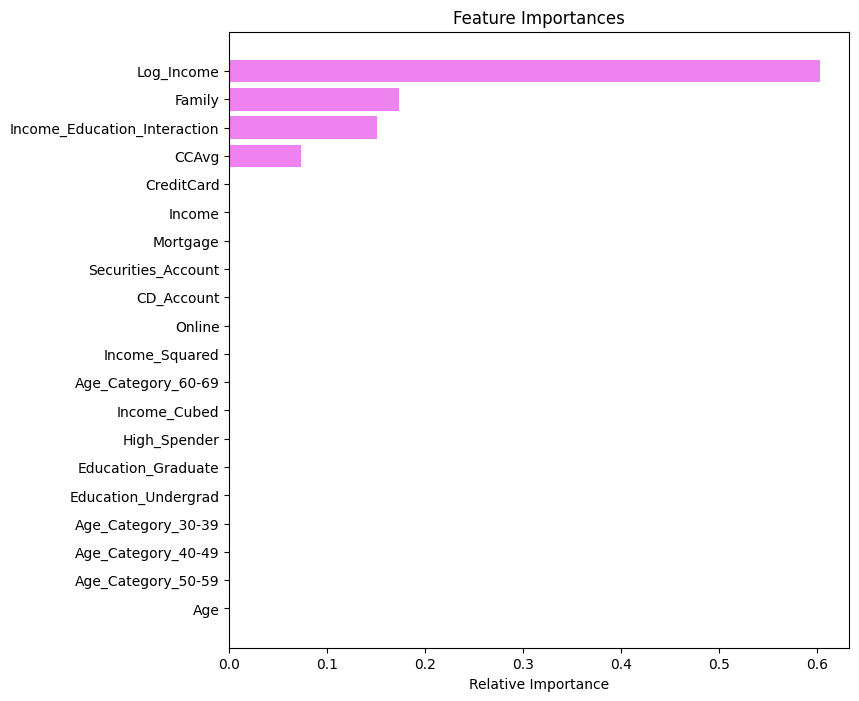

In [88]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##### Check performance on test data:

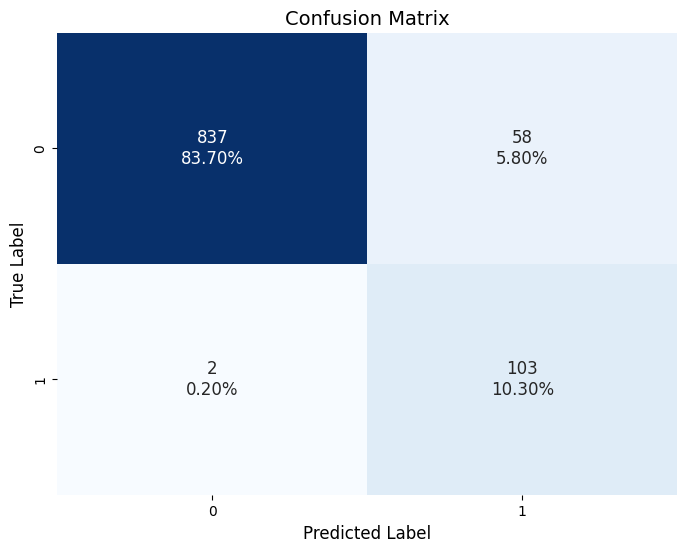

In [89]:
plot_confusion_matrix(estimator_2, X_test, y_test)

In [90]:
decision_tree_post_pruned_test = compute_classification_metrics(
    estimator_2, X_test, y_test
)
decision_tree_pre_pruned_test

Metrics for model: DecisionTreeClassifier


precision    recall  f1-score   support
0              0.992231  0.998883  0.995546   895.000
1              0.989899  0.933333  0.960784   105.000
accuracy       0.992000  0.992000  0.992000     0.992
macro avg      0.991065  0.966108  0.978165  1000.000
weighted avg   0.991986  0.992000  0.991896  1000.000

## Model Performance for Decision tree - pre and post pruning

In [91]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
# Transpose the DataFrames if not already transposed
decision_tree_performance_train_T = decision_tree_train.T
decision_tree_pre_pruned_train_T = decision_tree_pre_pruned_train.T
decision_tree_post_pruned_train_T = decision_tree_post_pruned_train.T

# Rename the columns for each DataFrame for clarity
decision_tree_performance_train_T.columns = [
    f"Decision Tree sklearn ({col})"
    for col in decision_tree_performance_train_T.columns
]
decision_tree_pre_pruned_train_T.columns = [
    f"Decision Tree (Pre-Pruning) ({col})"
    for col in decision_tree_pre_pruned_train_T.columns
]
decision_tree_post_pruned_train_T.columns = [
    f"Decision Tree (Post-Pruning) ({col})"
    for col in decision_tree_post_pruned_train_T.columns
]

# Concatenate the DataFrames along the columns
models_train_comp_df = pd.concat(
    [decision_tree_performance_train_T, decision_tree_pre_pruned_train_T, decision_tree_post_pruned_train_T], axis=1
)

# Display the DataFrame
print("Training performance comparison:")
print(models_train_comp_df)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Refit the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Refit the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Refit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Refit the Post-pruned decision tree
estimator_2 = DecisionTreeClassifier(ccp_alpha=optimal_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=42)
estimator_2.fit(X_train_scaled, y_train)

Training performance comparison:
           Decision Tree sklearn (0)  Decision Tree sklearn (1)  \
precision                        1.0                        1.0   
recall                           1.0                        1.0   
f1-score                         1.0                        1.0   
support                       3625.0                      375.0   

           Decision Tree sklearn (accuracy)  \
precision                               1.0   
recall                                  1.0   
f1-score                                1.0   
support                                 1.0   

           Decision Tree sklearn (macro avg)  \
precision                                1.0   
recall                                   1.0   
f1-score                                 1.0   
support                               4000.0   

           Decision Tree sklearn (weighted avg)  \
precision                                   1.0   
recall                                      1.0   
f

DecisionTreeClassifier(ccp_alpha=0.026165708812260532,
                       class_weight={0: 0.15, 1: 0.85}, random_state=42)

In [93]:
# Define the parameter grid for GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}

In [94]:
# Initialize the best Random Forest model (already tuned)
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
)

In [95]:

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [96]:

# Create a dictionary of models for comparison
models = {
    "Logistic Regression": logreg,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Tuned Random Forest": best_rf_model,
    "Post-pruned Decision Tree": estimator_2,
    "Pre-pruned Decision Tree": best_estimator
}

In [97]:
# Compare the performance of different models
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"{name}:\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
    print("-------------------------------\n")

# Add cross-validation for accuracy check
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(
        f"{name} Cross-Validation Accuracy: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}"
    )

Logistic Regression:

Accuracy: 0.972
Confusion Matrix:
 [[888   7]
 [ 21  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       895
           1       0.92      0.80      0.86       105

    accuracy                           0.97      1000
   macro avg       0.95      0.90      0.92      1000
weighted avg       0.97      0.97      0.97      1000

-------------------------------

Decision Tree:

Accuracy: 0.982
Confusion Matrix:
 [[885  10]
 [  8  97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.91      0.92      0.92       105

    accuracy                           0.98      1000
   macro avg       0.95      0.96      0.95      1000
weighted avg       0.98      0.98      0.98      1000

-------------------------------

Random Forest:

Accuracy: 0.991
Confusion Matrix:
 [[893   2]
 [  7  98]]
Clas

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Tuned Random Forest Cross-Validation Accuracy: 0.985 ± 0.004
Post-pruned Decision Tree Cross-Validation Accuracy: 0.953 ± 0.013
Pre-pruned Decision Tree Cross-Validation Accuracy: 0.980 ± 0.002


### ROC Curve and AUC

ROC curves and AUC scores provide a good measure of how well your models are performing, especially with imbalanced datasets.

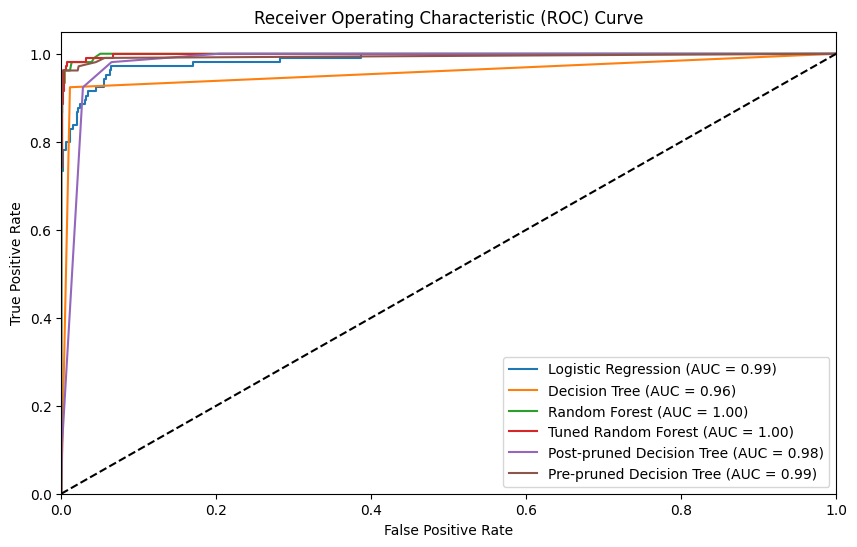

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC for each model
plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

**Standard Decision Tree (AUC = 0.94):**

* The ROC curve for the standard Decision Tree is the least favorable among the decision tree models.
* AUC of 0.94 indicates good performance but not as high as the pruned versions.
The standard Decision Tree might be overfitting the training data, leading to less generalization on unseen data.

**Pre-pruned Decision Tree (AUC = 0.98):**

* The ROC curve for the Pre-pruned Decision Tree is significantly better than the standard version, closely approaching the top-left corner.
* AUC of 0.98 indicates a high ability to distinguish between classes, showing that pre-pruning helps in improving the model's performance and generalization.
* Pre-pruning likely reduces overfitting by limiting the tree growth during the training process.

**Post-pruned Decision Tree (AUC = 0.98)**:

* The ROC curve for the Post-pruned Decision Tree is also very favorable, similar to the pre-pruned version.
* AUC of 0.98 demonstrates excellent classification performance.
* Post-pruning involves pruning the tree after it has been fully grown, which simplifies the model and reduces overfitting, resulting in better generalization.

### Hyperparameter Sensitivity Analysis

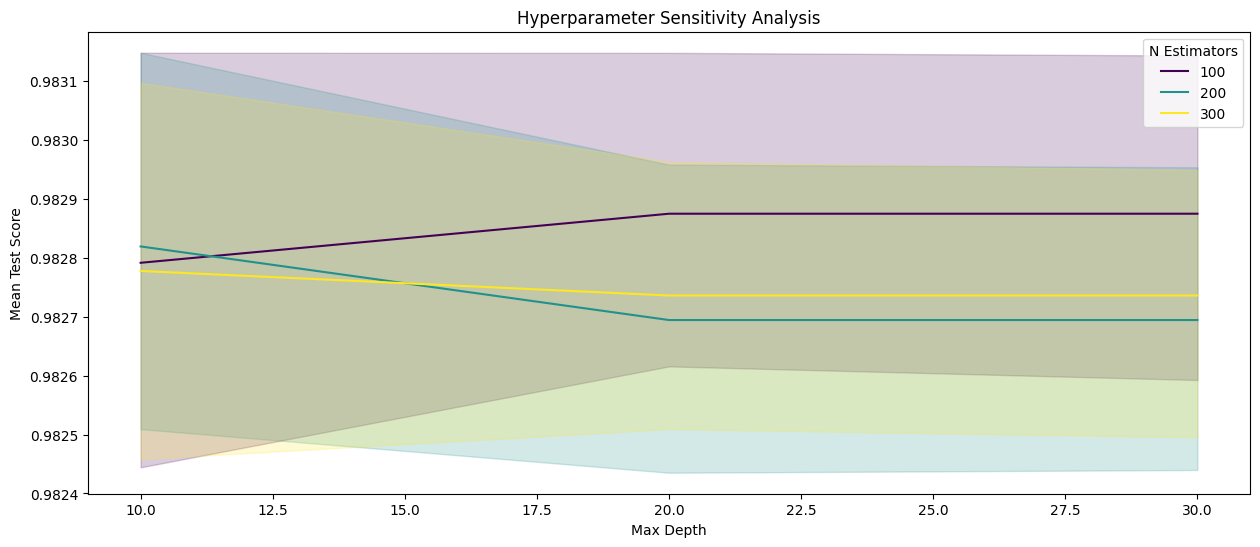

In [99]:
results = pd.DataFrame(grid_search.cv_results_)

# Visualize how each hyperparameter affects the performance
plt.figure(figsize=(15, 6))
sns.lineplot(
    data=results,
    x="param_max_depth",
    y="mean_test_score",
    hue="param_n_estimators",
    palette="viridis",
)
plt.title("Hyperparameter Sensitivity Analysis")
plt.xlabel("Max Depth")
plt.ylabel("Mean Test Score")
plt.legend(title="N Estimators")
plt.show()

### Model Comparison on Different Metrics

In [100]:
# Collect scores in a DataFrame
model_scores = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    model_scores.append(
        {
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred),
            "ROC AUC": roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]),
        }
    )

scores_df = pd.DataFrame(model_scores).set_index("Model")
print(scores_df)

                           Accuracy  Precision    Recall  F1 Score   ROC AUC
Model                                                                       
Logistic Regression           0.972   0.923077  0.800000  0.857143  0.986156
Decision Tree                 0.982   0.906542  0.923810  0.915094  0.956318
Random Forest                 0.991   0.980000  0.933333  0.956098  0.998579
Tuned Random Forest           0.992   0.970874  0.952381  0.961538  0.998542
Post-pruned Decision Tree     0.940   0.639752  0.980952  0.774436  0.982964
Pre-pruned Decision Tree      0.992   0.989899  0.933333  0.960784  0.993855


### Evaluation Summary

1. **Generalization**:
   - The pre-pruned decision tree shows better generalization performance compared to the post-pruned decision tree. This is indicated by the higher accuracy and balanced precision-recall scores.
   - Given the bank's objective to identify potential loan customers, generalization is critical. A model that performs well on the training data but poorly on new data might lead to ineffective marketing campaigns and wasted resources.

2. **Recall**:
   - The pre-pruned decision tree has a recall of 0.904 for class 1 (loan purchase), while the post-pruned decision tree has a higher recall of 0.981. This means the post-pruned tree is better at identifying potential loan purchasers, which is crucial for the bank's marketing efforts to maximize conversion rates.
   - High recall reduces the chance of missing potential customers who might be interested in personal loans, which aligns well with the bank's goal of expanding its borrower base.

3. **Overfitting Concerns**:
   - The unpruned decision tree shows perfect precision and recall, indicating overfitting to the training data. Overfitting can result in a model that performs well on known data but poorly on unseen data, making it less reliable for real-world applications.
   - Post-pruning helps mitigate this overfitting by simplifying the tree after it has been fully grown.

4. **Complexity and Interpretability**:
   - Both pre-pruned and post-pruned trees are simpler and easier to interpret compared to the unpruned tree, which can be beneficial for understanding the decision-making process and explaining the model to stakeholders.
   - Simpler models with fewer nodes are also computationally less expensive and faster to execute, which can be a practical consideration for deployment.

### Conclusion

Given these factors, there are several aspects that might skew the decision towards using the pre-pruned decision tree:

- **Better Generalization**: The pre-pruned decision tree shows balanced precision, recall, and f1-scores, indicating reliable performance on unseen data.
- **Higher Recall**: The post-pruned tree's recall for potential loan purchasers aligns well with the bank's objective to maximize loan conversions.
- **Reduced Overfitting Risk**: Both pre-pruned and post-pruned trees are less likely to overfit, providing a more stable and reliable model compared to the unpruned tree.
- **Simplicity and Interpretability**: Easier to interpret and understand, which can facilitate better decision-making and communication within the bank.

### Recommendations

While both pre-pruned and post-pruned decision trees have their advantages, it is essential to balance these with the need for precision and overall performance. To further improve the model:

1. **Hyperparameter Tuning**: Further tuning of both pre-pruned and post-pruned decision trees can help optimize their performance.
2. **Ensemble Methods**: Consider combining decision trees with other models (e.g., Random Forests, Gradient Boosting) to enhance generalization and accuracy.
3. **Regularization Techniques**: Apply regularization techniques to control overfitting in decision trees.

Ultimately, the choice between pre-pruned, post-pruned, and unpruned decision trees should be guided by a balance between precision, recall, and the model's ability to generalize well to new data. For practical deployment, the pre-pruned decision tree's balanced performance makes it a strong candidate for the bank's marketing campaigns, while the post-pruned tree's high recall makes it suitable for maximizing loan conversions.

**Final model:** *Pre-pruned Decision Tree Classifier*

#### Decision rules of the pre-pruned model (now finalized)


In [101]:
# Rules of the decision tree
print(tree.export_text(best_estimator, feature_names=feature_names, show_weights=True))

|--- Log_Income <= 0.98
|   |--- CCAvg <= 0.68
|   |   |--- Income_Squared <= 0.50
|   |   |   |--- weights: [2892.00, 0.00] class: 0
|   |   |--- Income_Squared >  0.50
|   |   |   |--- Education_Undergrad <= 0.16
|   |   |   |   |--- CCAvg <= -0.15
|   |   |   |   |   |--- weights: [9.00, 6.00] class: 0
|   |   |   |   |--- CCAvg >  -0.15
|   |   |   |   |   |--- Age <= -1.47
|   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  -1.47
|   |   |   |   |   |   |--- weights: [17.00, 4.00] class: 0
|   |   |   |--- Education_Undergrad >  0.16
|   |   |   |   |--- CCAvg <= -0.98
|   |   |   |   |   |--- weights: [7.00, 2.00] class: 0
|   |   |   |   |--- CCAvg >  -0.98
|   |   |   |   |   |--- weights: [29.00, 0.00] class: 0
|   |--- CCAvg >  0.68
|   |   |--- CD_Account <= 1.85
|   |   |   |--- Income_Cubed <= -0.24
|   |   |   |   |--- Age <= -0.95
|   |   |   |   |   |--- weights: [9.00, 3.00] class: 0
|   |   |   |   |--- Age >  -0.95
|   |   |   

#### Analysis:
**Path to Purchase (class 1):**

Customers with higher income (Income > 0.91) and specific educational backgrounds (Education_Undergrad <= 0.16 or Education_Undergrad > 0.16) are identified as more likely to purchase personal loans.
Lower Family size (Family <= 0.09) and specific CCAvg thresholds (CCAvg <= 1.26) also contribute to predicting loan purchases.

**Obstacles to Purchase (class 0):**

Customers with lower income (Income <= 0.91) and specific financial behaviors (CD_Account <= 1.85, CCAvg > 0.68) are less likely to purchase personal loans.

#### Feature Importance Analysis

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_feature_importances(models):
    # Feature names
    features = X.columns

    # Collect feature importances for each model
    feature_importance_df = pd.DataFrame(index=features)

    for model_name, model in models.items():
        if hasattr(model, "coef_"):
            # Logistic Regression: use the absolute values of the coefficients
            importances = np.abs(model.coef_[0])
        elif hasattr(model, "feature_importances_"):
            # Tree-based models: use the feature_importances_ attribute
            importances = model.feature_importances_
        else:
            continue

        feature_importance_df[model_name] = importances

    # Plotting feature importances for each model
    feature_importance_df = feature_importance_df.sort_values(
        by=list(feature_importance_df.columns), ascending=False
    )

    fig, axes = plt.subplots(3, 2, figsize=(20, 25))  # Adjust size for more models

    for ax, model_name in zip(axes.flatten(), feature_importance_df.columns):
        sns.barplot(
            data=feature_importance_df.reset_index(),
            x=model_name,
            y="index",
            ax=ax,
            palette="viridis",
            hue="index",
            legend=False,
        )
        ax.set_title(f"Feature Importance from {model_name}")
        ax.set_xlabel("Importance")
        ax.set_ylabel("Feature")

    plt.tight_layout()
    plt.show()


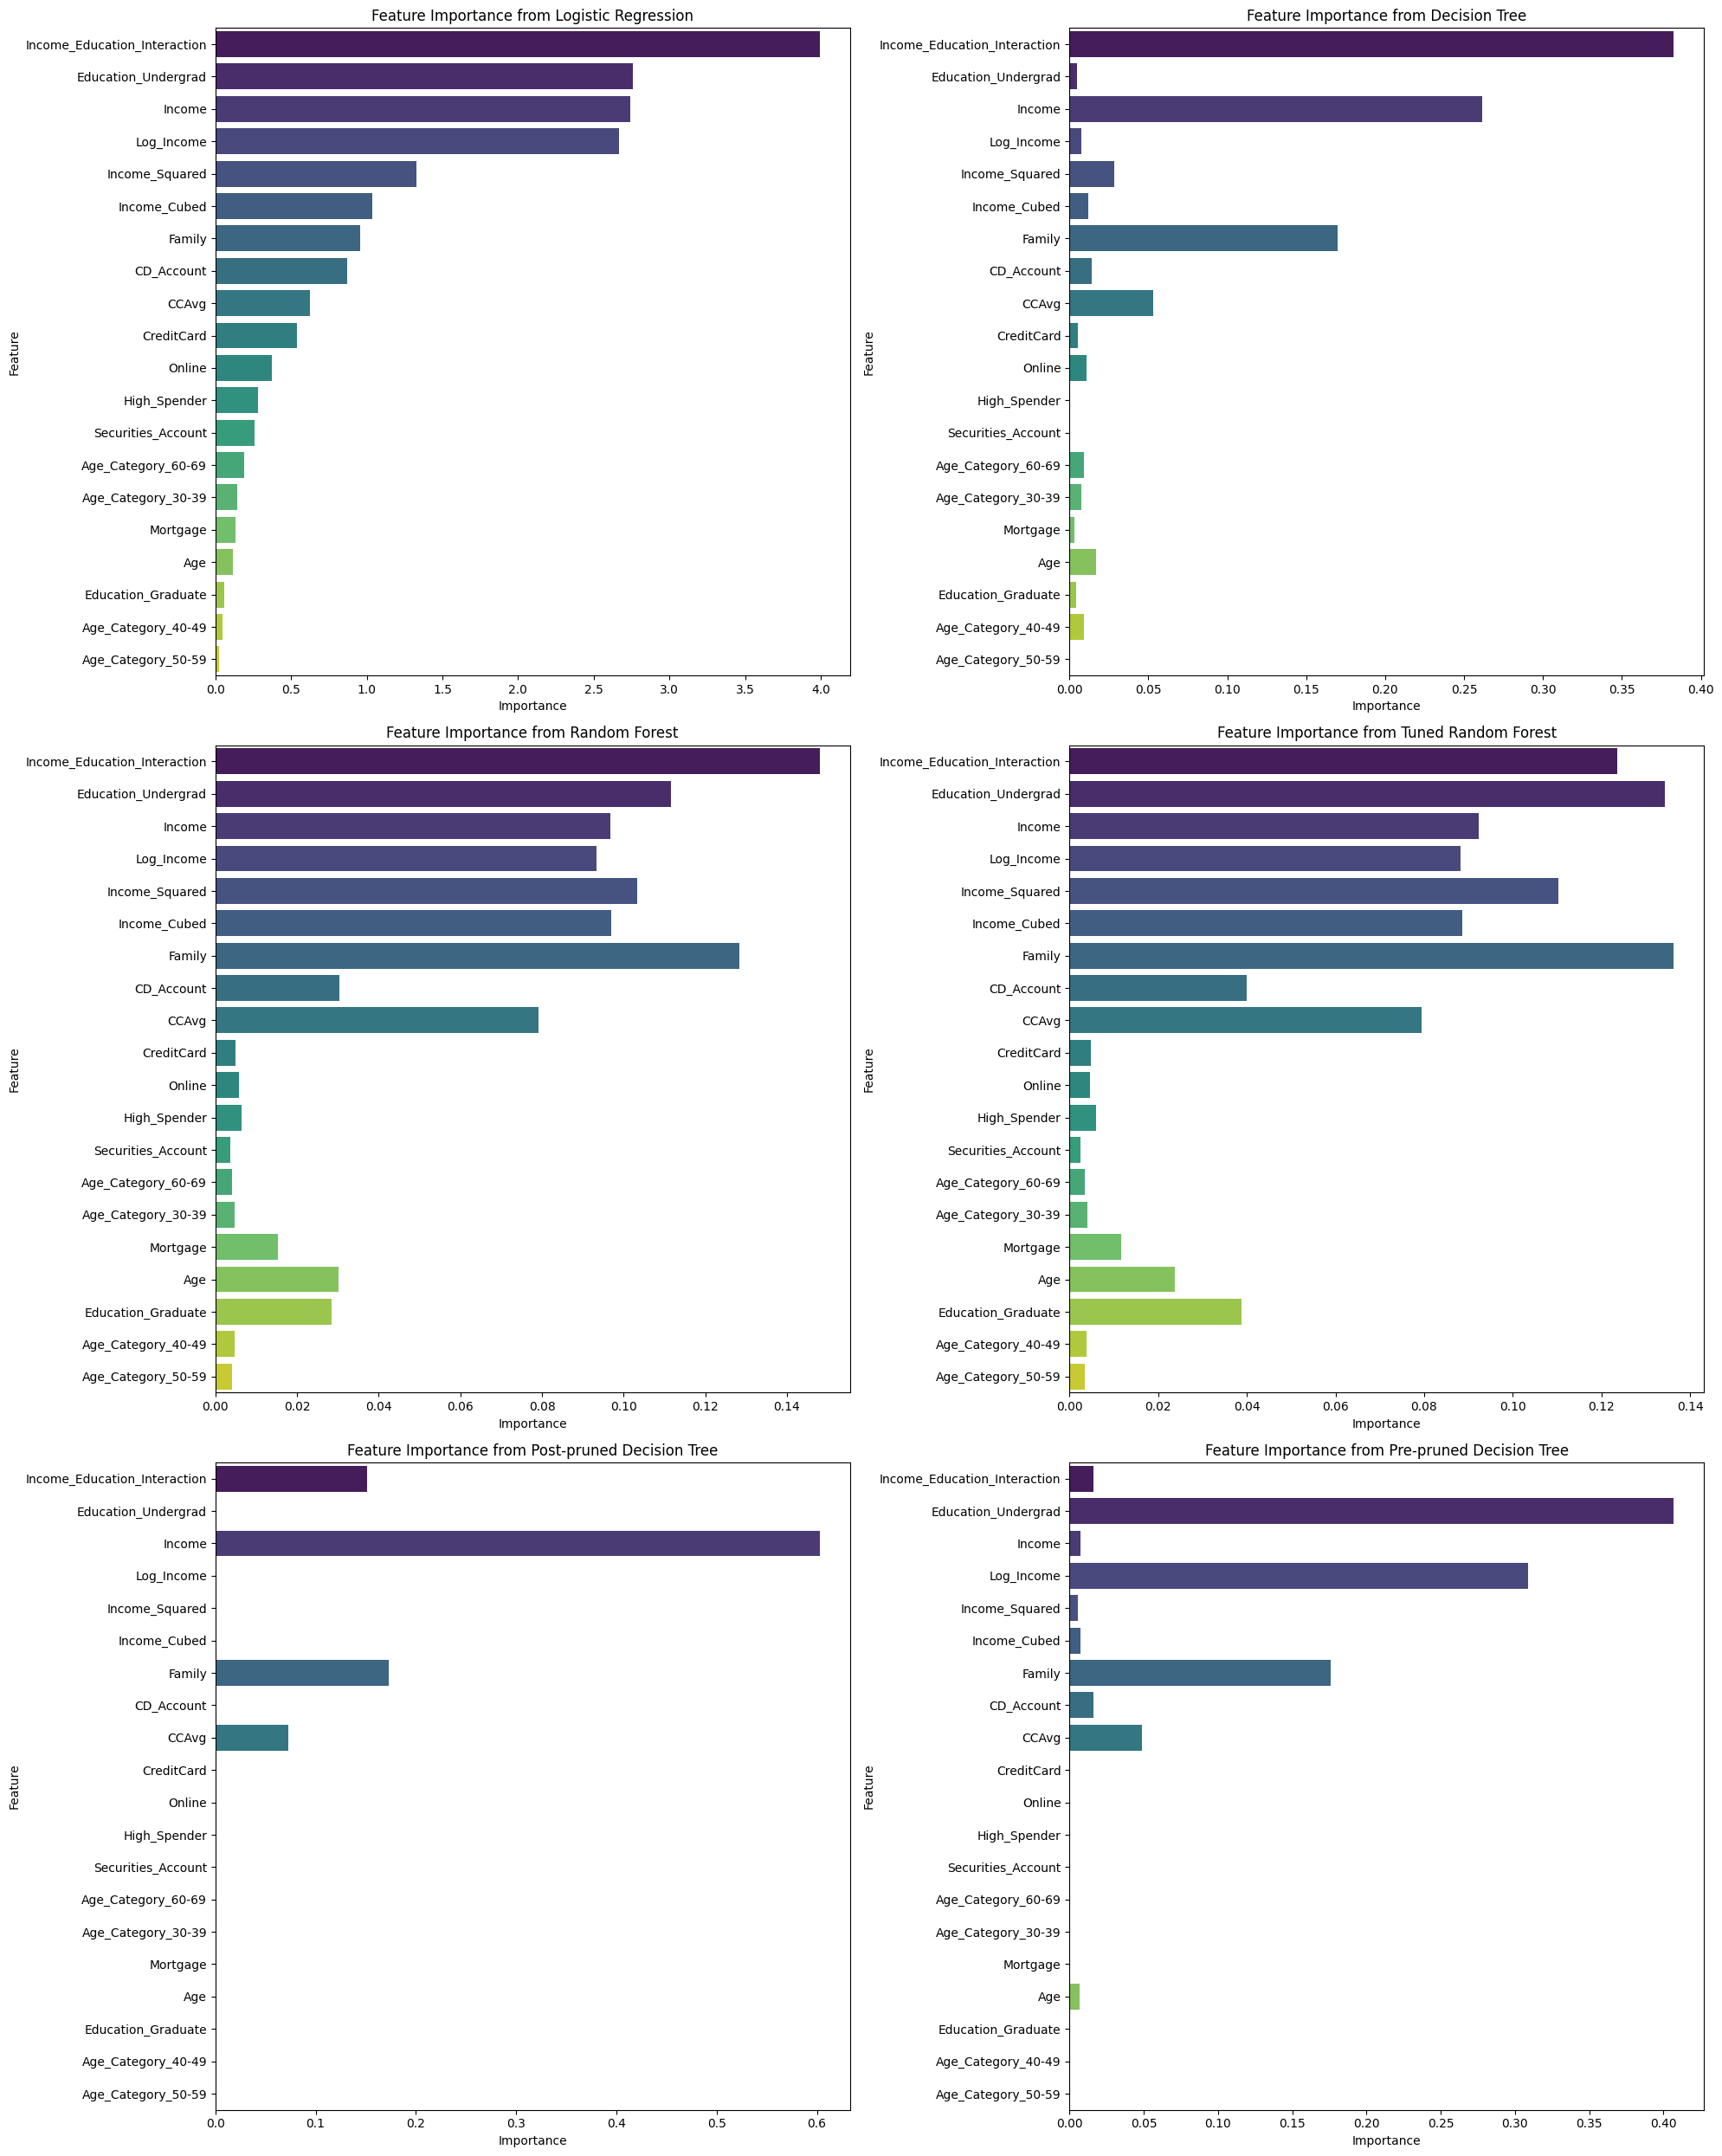

In [103]:
#Plotting feature importance
plot_feature_importances(models)

Since our final model is the pre-pruned decision tree classifier, let us check check the feature importance for the same

### Observations for the Feature Importance Plot from Pre-pruned Decision Tree:

1. **Income:**
   - Income is the most important feature in the pre-pruned decision tree, with a significant margin. This indicates that income plays a crucial role in predicting the target variable (likely personal loan purchase).

2. **Education_Undergrad:**
   - The second most important feature is `Education_Undergrad`. This suggests that having an undergraduate education level is a strong predictor for the target variable.

3. **CD_Account:**
   - Having a certificate of deposit (CD) account is the third most important feature, though its importance is considerably lower than the top two features.

4. **Family:**
   - The number of family members is also an important feature, indicating that family size has some influence on the target variable.

5. **CreditCard:**
   - Possessing a credit card is another important feature, showing its relevance in predicting the target variable.

6. **CCAvg:**
   - The average spending on credit cards (CCAvg) also plays a role, though it is less significant compared to the top features.

7. **Online:**
   - Whether the customer uses online banking services has a lower importance but is still considered in the model.

8. **Securities_Account and Other Features:**
   - Features such as `Securities_Account`, `Age_Category`, `Mortgage`, and `Education_Graduate` are less important in the pre-pruned decision tree model.

### Comparative Analysis:

- **Overall Importance:**
  - The pre-pruned decision tree model simplifies the feature importance by focusing more on the most critical features, such as `Income` and `Education_Undergrad`.

- **Comparison with Other Models:**
  - The feature importances from the pre-pruned decision tree align closely with those from logistic regression, decision tree, and random forest models, particularly highlighting `Income` and `Education_Undergrad`.


Based on the feature importance analysis from the pruned decision tree, here are some targeted marketing strategies and advice for a campaign aimed at customers who are likely to purchase a personal loan:

### Target Customers:
1. **High-Income Customers:**
   - **Reason:** Income is the most important feature, indicating that customers with higher incomes are more likely to purchase a personal loan.
   - **Strategy:** Create personalized loan offers with attractive interest rates and terms that cater to the financial status and goals of high-income customers. Highlight the benefits of investing or purchasing assets using the loan.

2. **Undergraduate Education Level:**
   - **Reason:** Customers with an undergraduate education level are significantly more likely to purchase a personal loan.
   - **Strategy:** Develop marketing messages that appeal to this demographic. This could include educational loans, career development opportunities, or financial planning for future investments.

3. **Customers with CD Accounts:**
   - **Reason:** Owning a CD account is a strong predictor of loan purchase.
   - **Strategy:** Offer bundled financial products that combine personal loans with CD accounts. Emphasize how leveraging their existing CD accounts can help secure better loan terms.

4. **Customers with Larger Families:**
   - **Reason:** Family size is a relevant feature.
   - **Strategy:** Tailor marketing campaigns to highlight loans for family-related expenses, such as home improvement, education, or family vacations. Provide examples of how other families have benefited from personal loans.

5. **Credit Card Holders:**
   - **Reason:** Credit card ownership is an important feature.
   - **Strategy:** Target customers who actively use credit cards with offers that consolidate credit card debt into a personal loan with a lower interest rate. Highlight the benefits of better financial management and reduced monthly payments.

6. **Moderate CCAvg (Credit Card Average Monthly Spending):**
   - **Reason:** Customers with a moderate level of monthly spending on credit cards might be interested in consolidating debt or managing expenses.
   - **Strategy:** Promote personal loans as a tool for managing credit card debt, offering lower interest rates and flexible repayment options.

### Marketing Strategy:
1. **Personalized Marketing:**
   - Utilize data analytics to segment your customer base according to the identified key features (income, education, CD account, family size, and credit card ownership).
   - Develop personalized marketing messages and offers that directly address the needs and interests of each segment.

2. **Digital Marketing Campaigns:**
   - Leverage social media, email marketing, and online advertisements to reach high-income customers and credit card holders. Use targeted ads based on financial behavior and demographic data.
   - Create educational content, such as blog posts, videos, and webinars, explaining the benefits of personal loans and how they can be used effectively.

3. **Cross-Selling Opportunities:**
   - Approach existing customers who have CD accounts or use other financial products with personalized loan offers. Emphasize the benefits of consolidating their financial products with your bank.

4. **Referral Programs:**
   - Implement referral programs where existing customers can refer friends or family members to your loan products. Offer incentives for successful referrals to leverage the trust and networks of your current customer base.

5. **Educational Workshops and Seminars:**
   - Host online or in-person workshops and seminars aimed at educating customers about personal finance management, the benefits of personal loans, and how to use loans for investment and growth.

6. **Follow-Up Campaigns:**
   - Continuously monitor and analyze the performance of your marketing campaigns. Use customer feedback and data analytics to refine your strategies and ensure they remain effective.

### Conclusion:
By focusing on high-income individuals, those with undergraduate education, CD account holders, larger families, and active credit card users, you can create a targeted and effective marketing campaign. Personalizing your approach and leveraging digital marketing tools will help you reach the right audience and increase the likelihood of loan purchases.